In [159]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [160]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

In [161]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Adham\Downloads\heart (1).csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [162]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


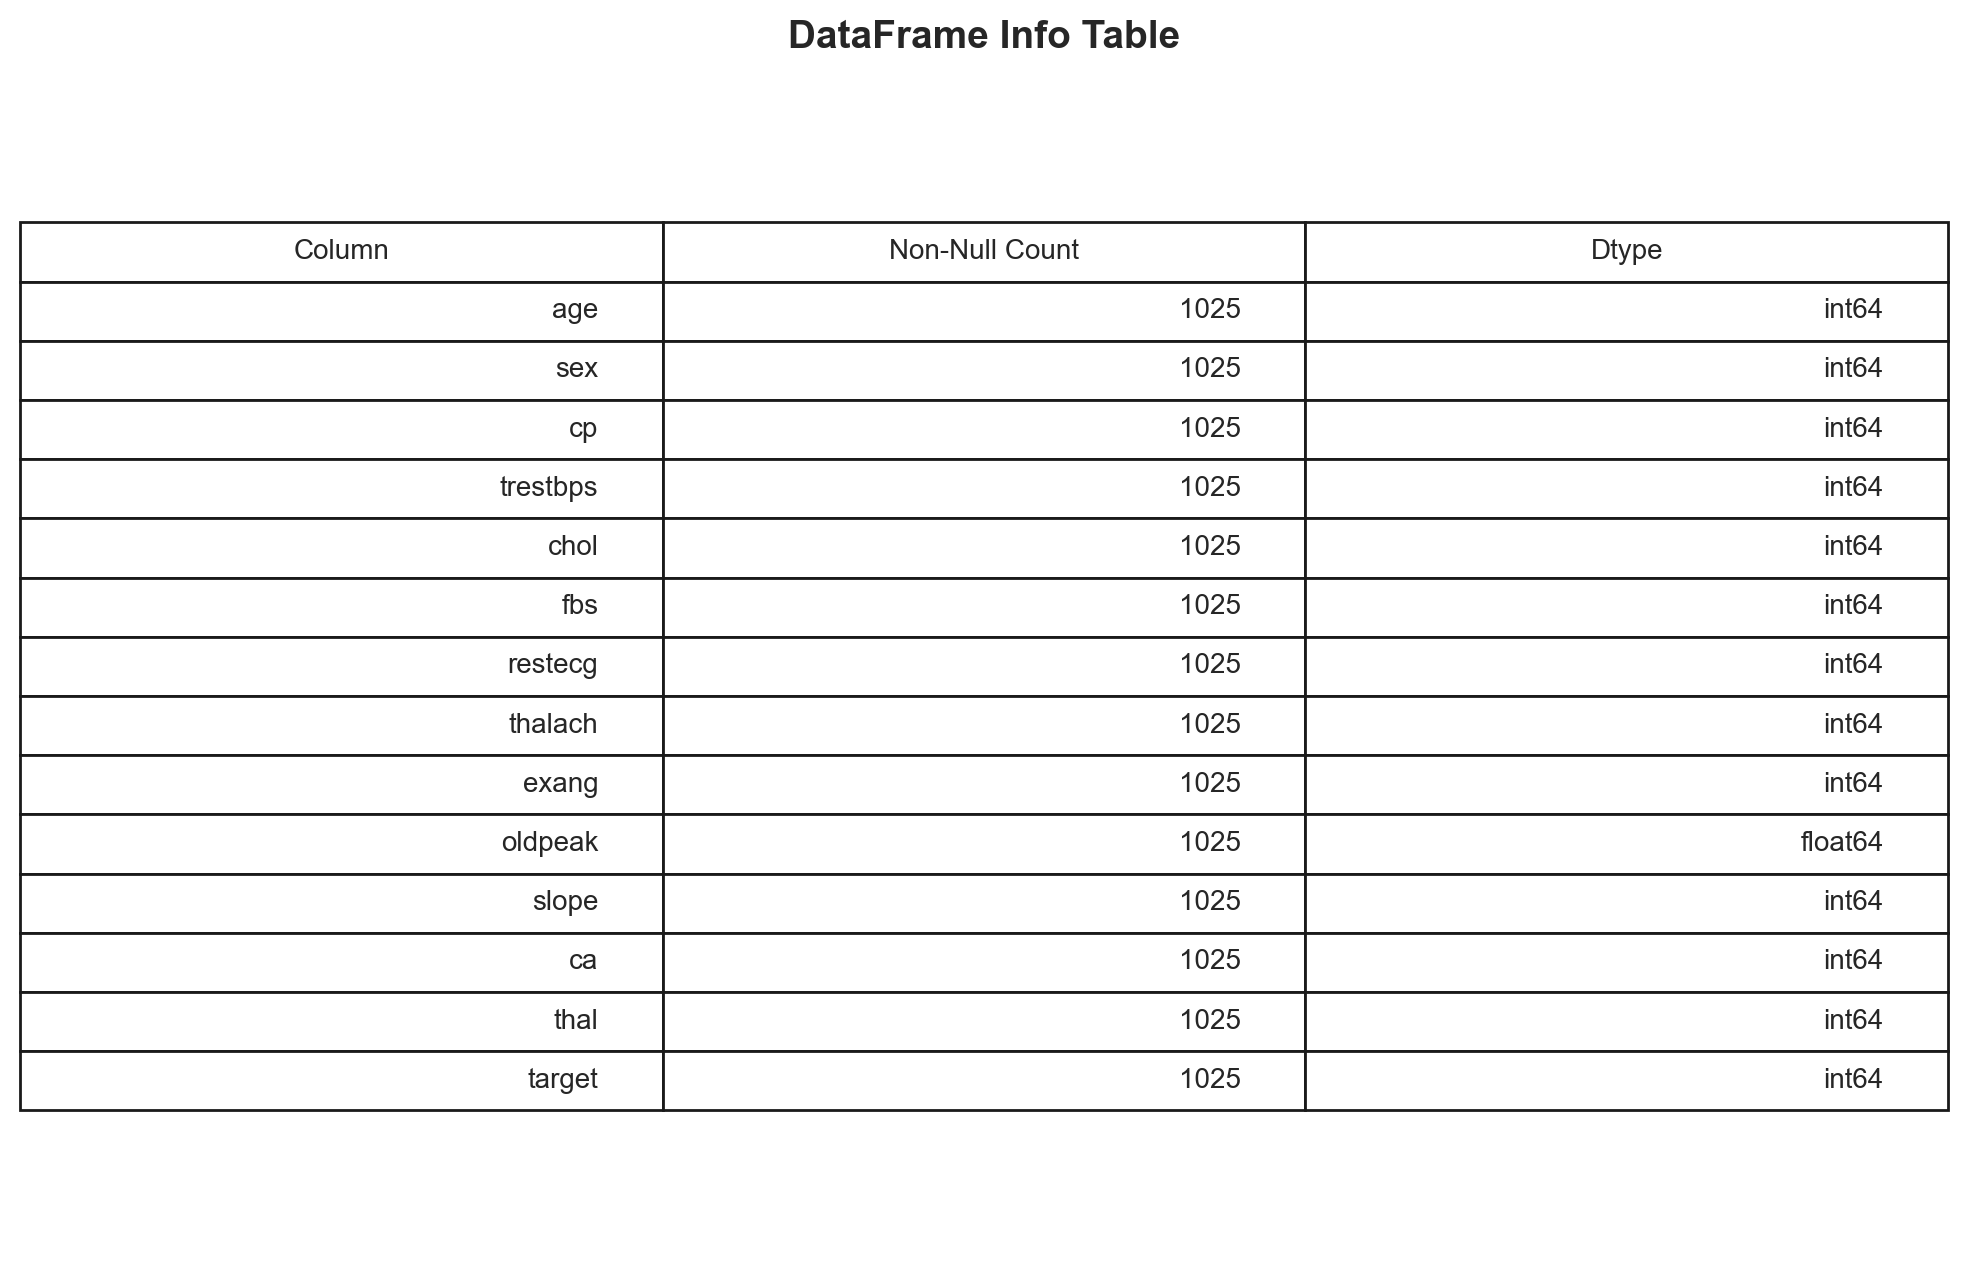

In [163]:


# Sample DataFrame (replace with your actual df)
# df = pd.read_csv("your_data.csv")

# Gather df.info()-like data
info_data = {
    "Column": df.columns,
    "Non-Null Count": [df[col].notnull().sum() for col in df.columns],
    "Dtype": [df[col].dtype for col in df.columns]
}

info_df = pd.DataFrame(info_data)

# Plot as table
fig, ax = plt.subplots(figsize=(10, len(info_df) * 0.4 + 1))
ax.axis('off')
table = ax.table(cellText=info_df.values, colLabels=info_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title("DataFrame Info Table", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [164]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


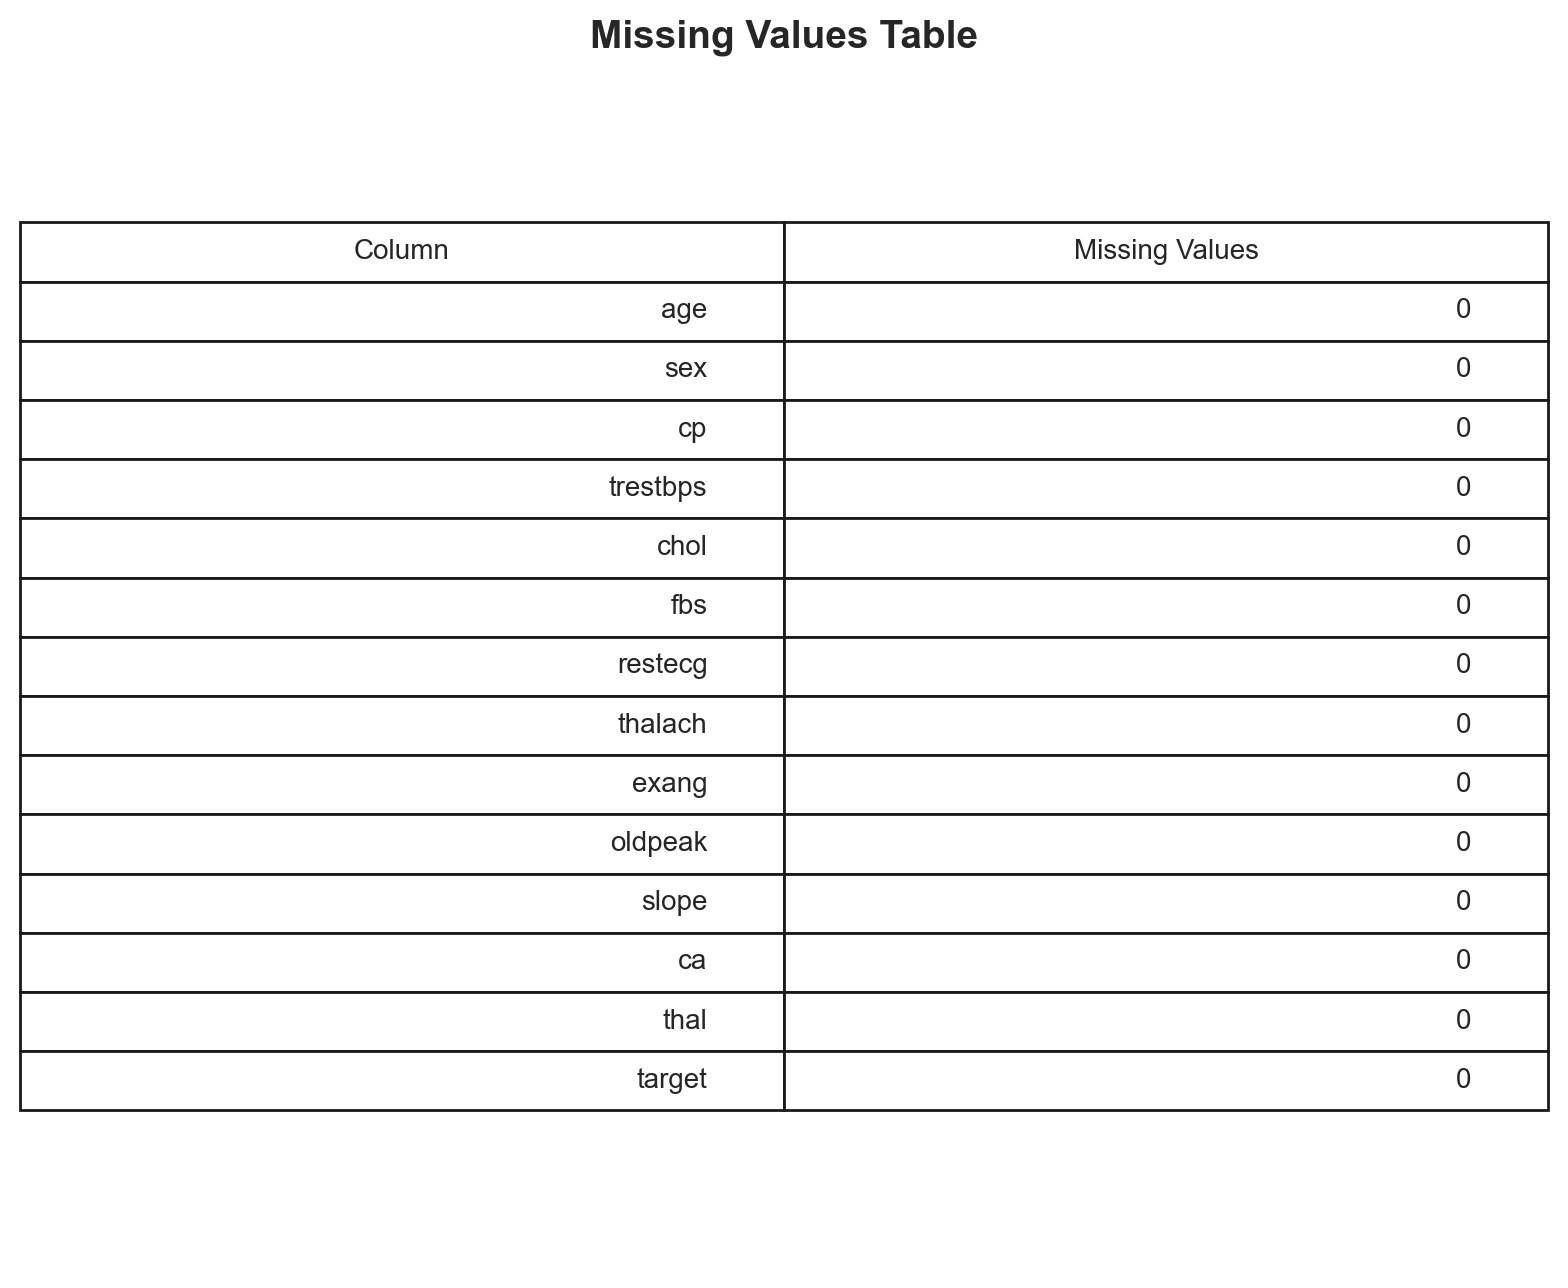

In [165]:
# Calculate missing values
missing_values = df.isnull().sum()

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})

# Plot the table
fig, ax = plt.subplots(figsize=(8, len(missing_df) * 0.4 + 1))
ax.axis('off')
table = ax.table(cellText=missing_df.values, colLabels=missing_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.title("Missing Values Table", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

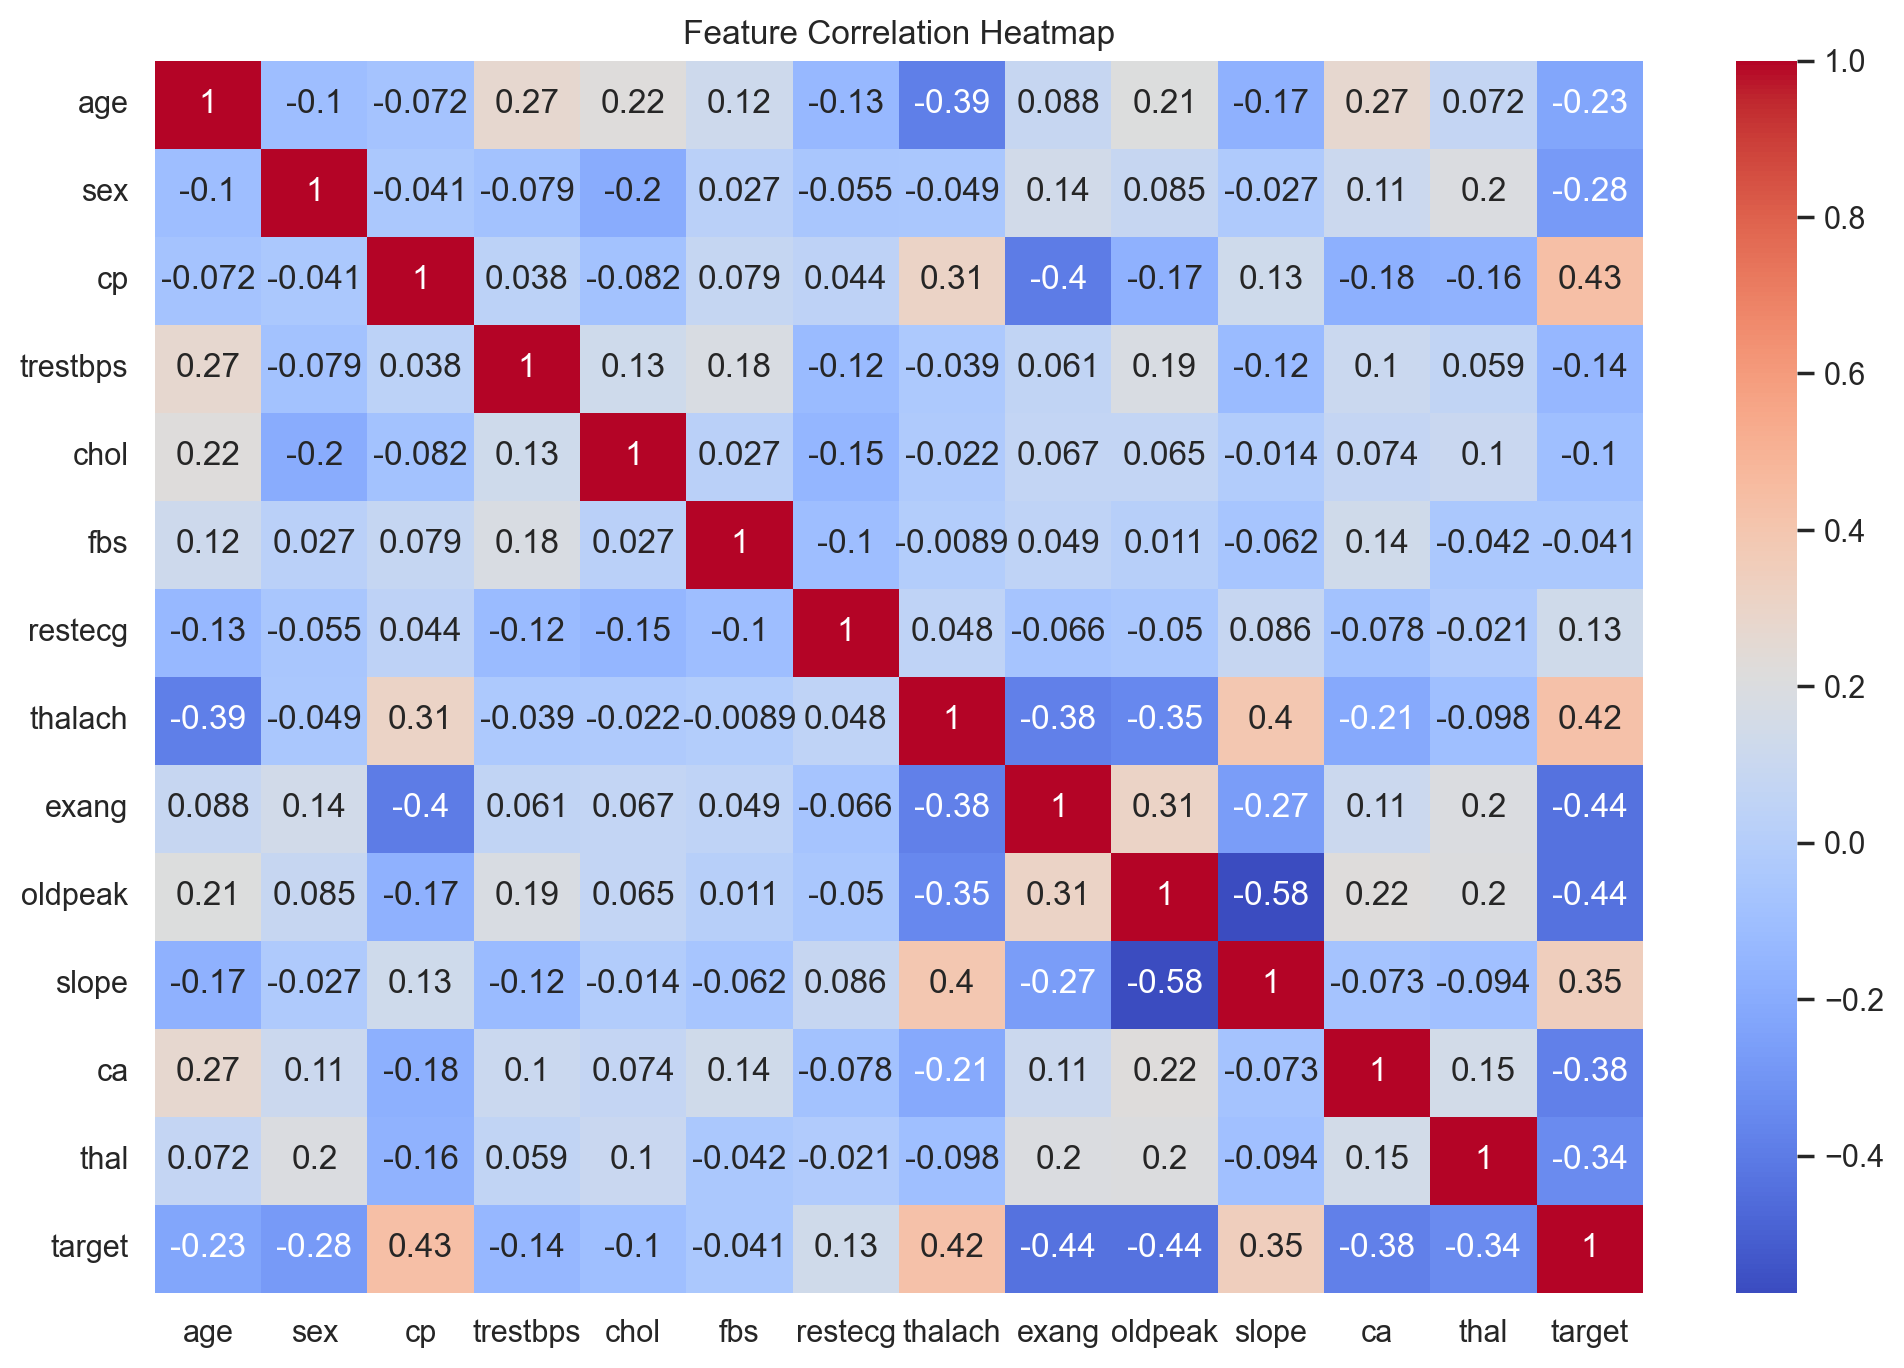

In [166]:

# Check correlations
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [167]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


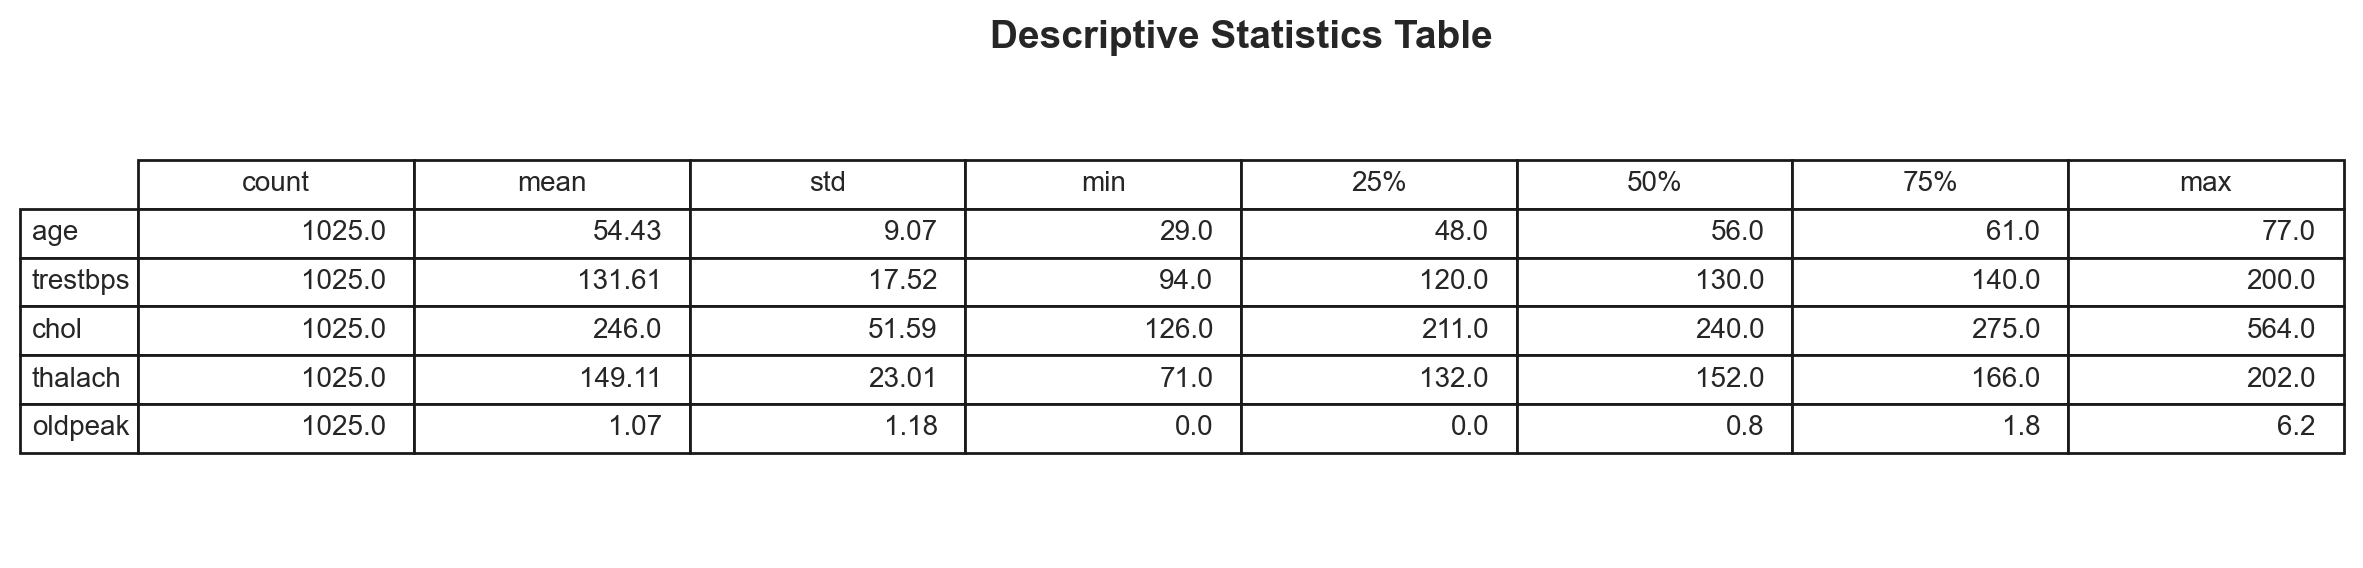

In [169]:


# Assuming df is your DataFrame
desc_df = df.describe().T  # Transpose for better readability

# Plot as table
fig, ax = plt.subplots(figsize=(12, len(desc_df) * 0.4 + 1))
ax.axis('off')
table = ax.table(cellText=desc_df.round(2).values,  # Round for cleaner display
                 colLabels=desc_df.columns,
                 rowLabels=desc_df.index,
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

plt.title("Descriptive Statistics Table", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [170]:
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


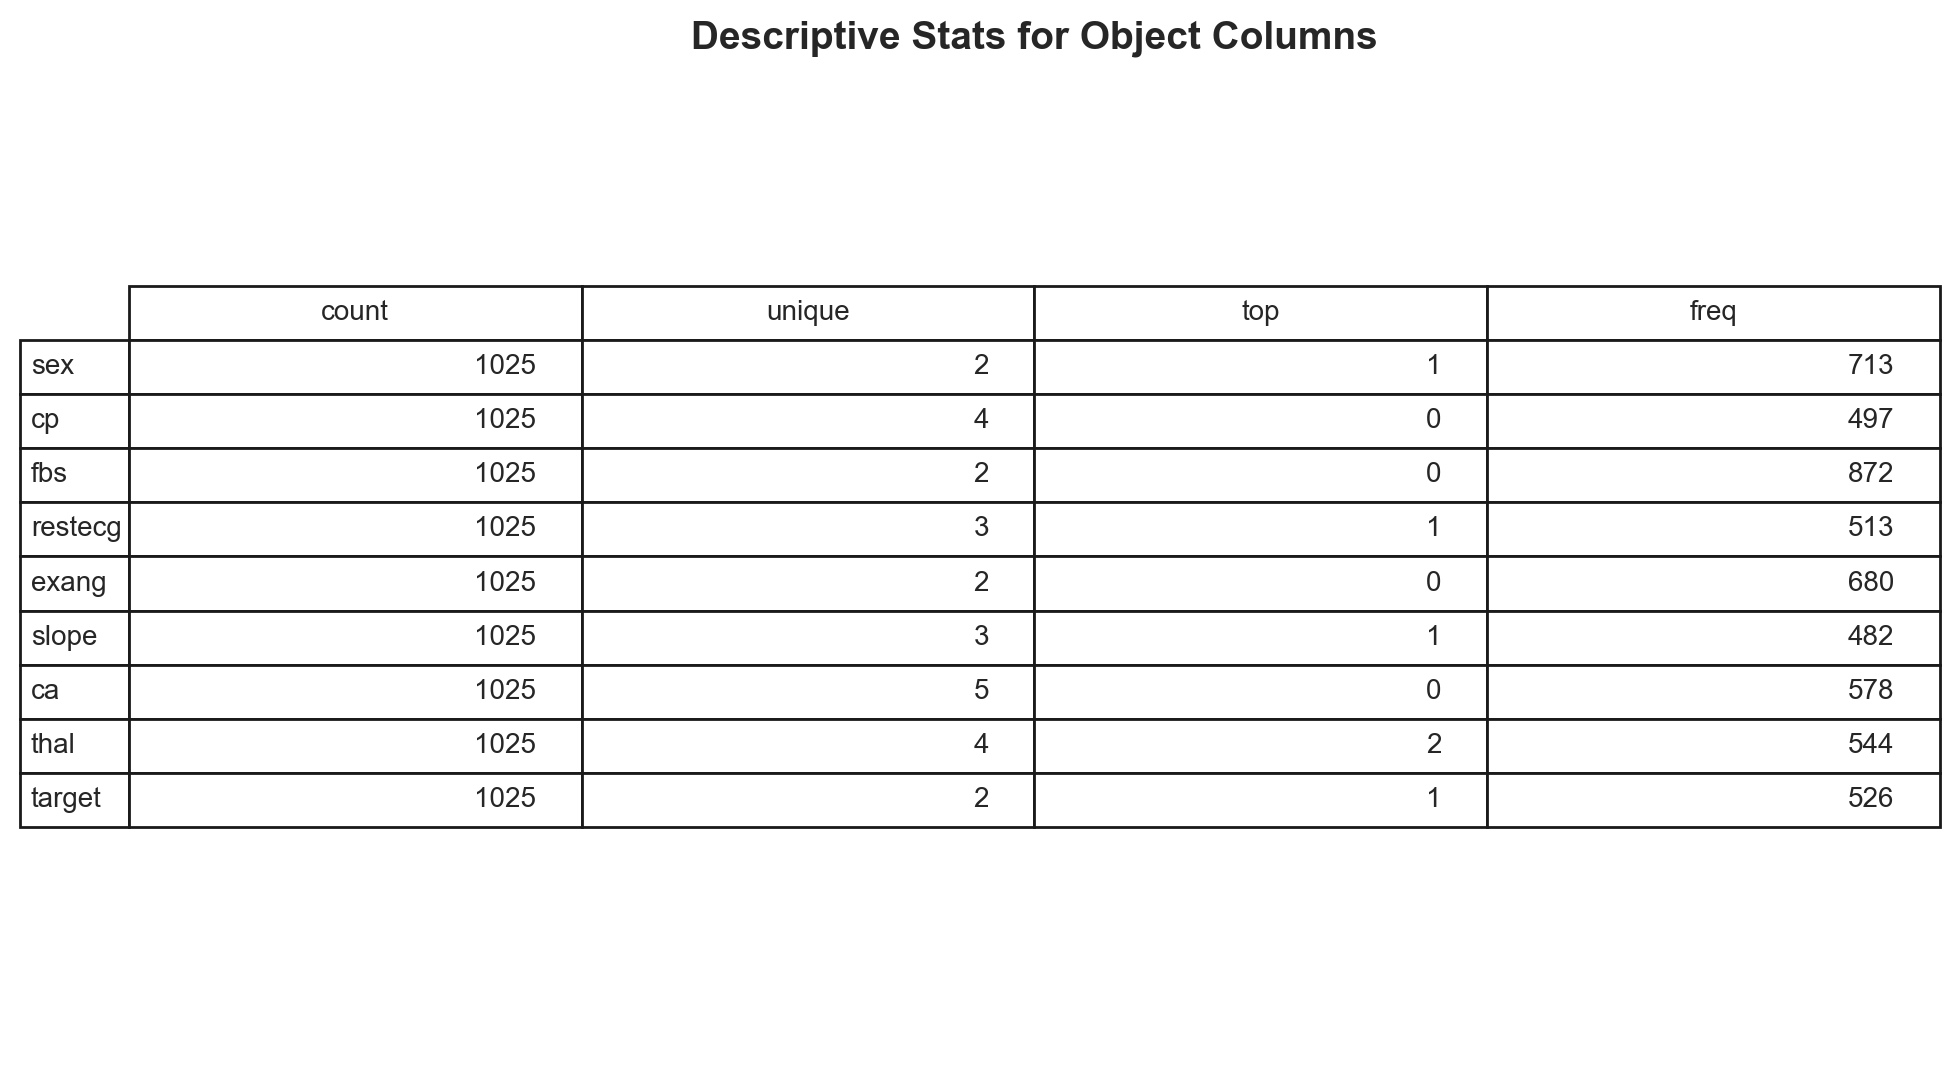

In [171]:
import matplotlib.pyplot as plt

# Generate description for object columns
desc_obj = df.describe(include='object').T  # Transpose for better formatting

# Plot as a table
fig, ax = plt.subplots(figsize=(10, len(desc_obj) * 0.5 + 1))
ax.axis('off')
table = ax.table(cellText=desc_obj.values,
                 colLabels=desc_obj.columns,
                 rowLabels=desc_obj.index,
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

plt.title("Descriptive Stats for Object Columns", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


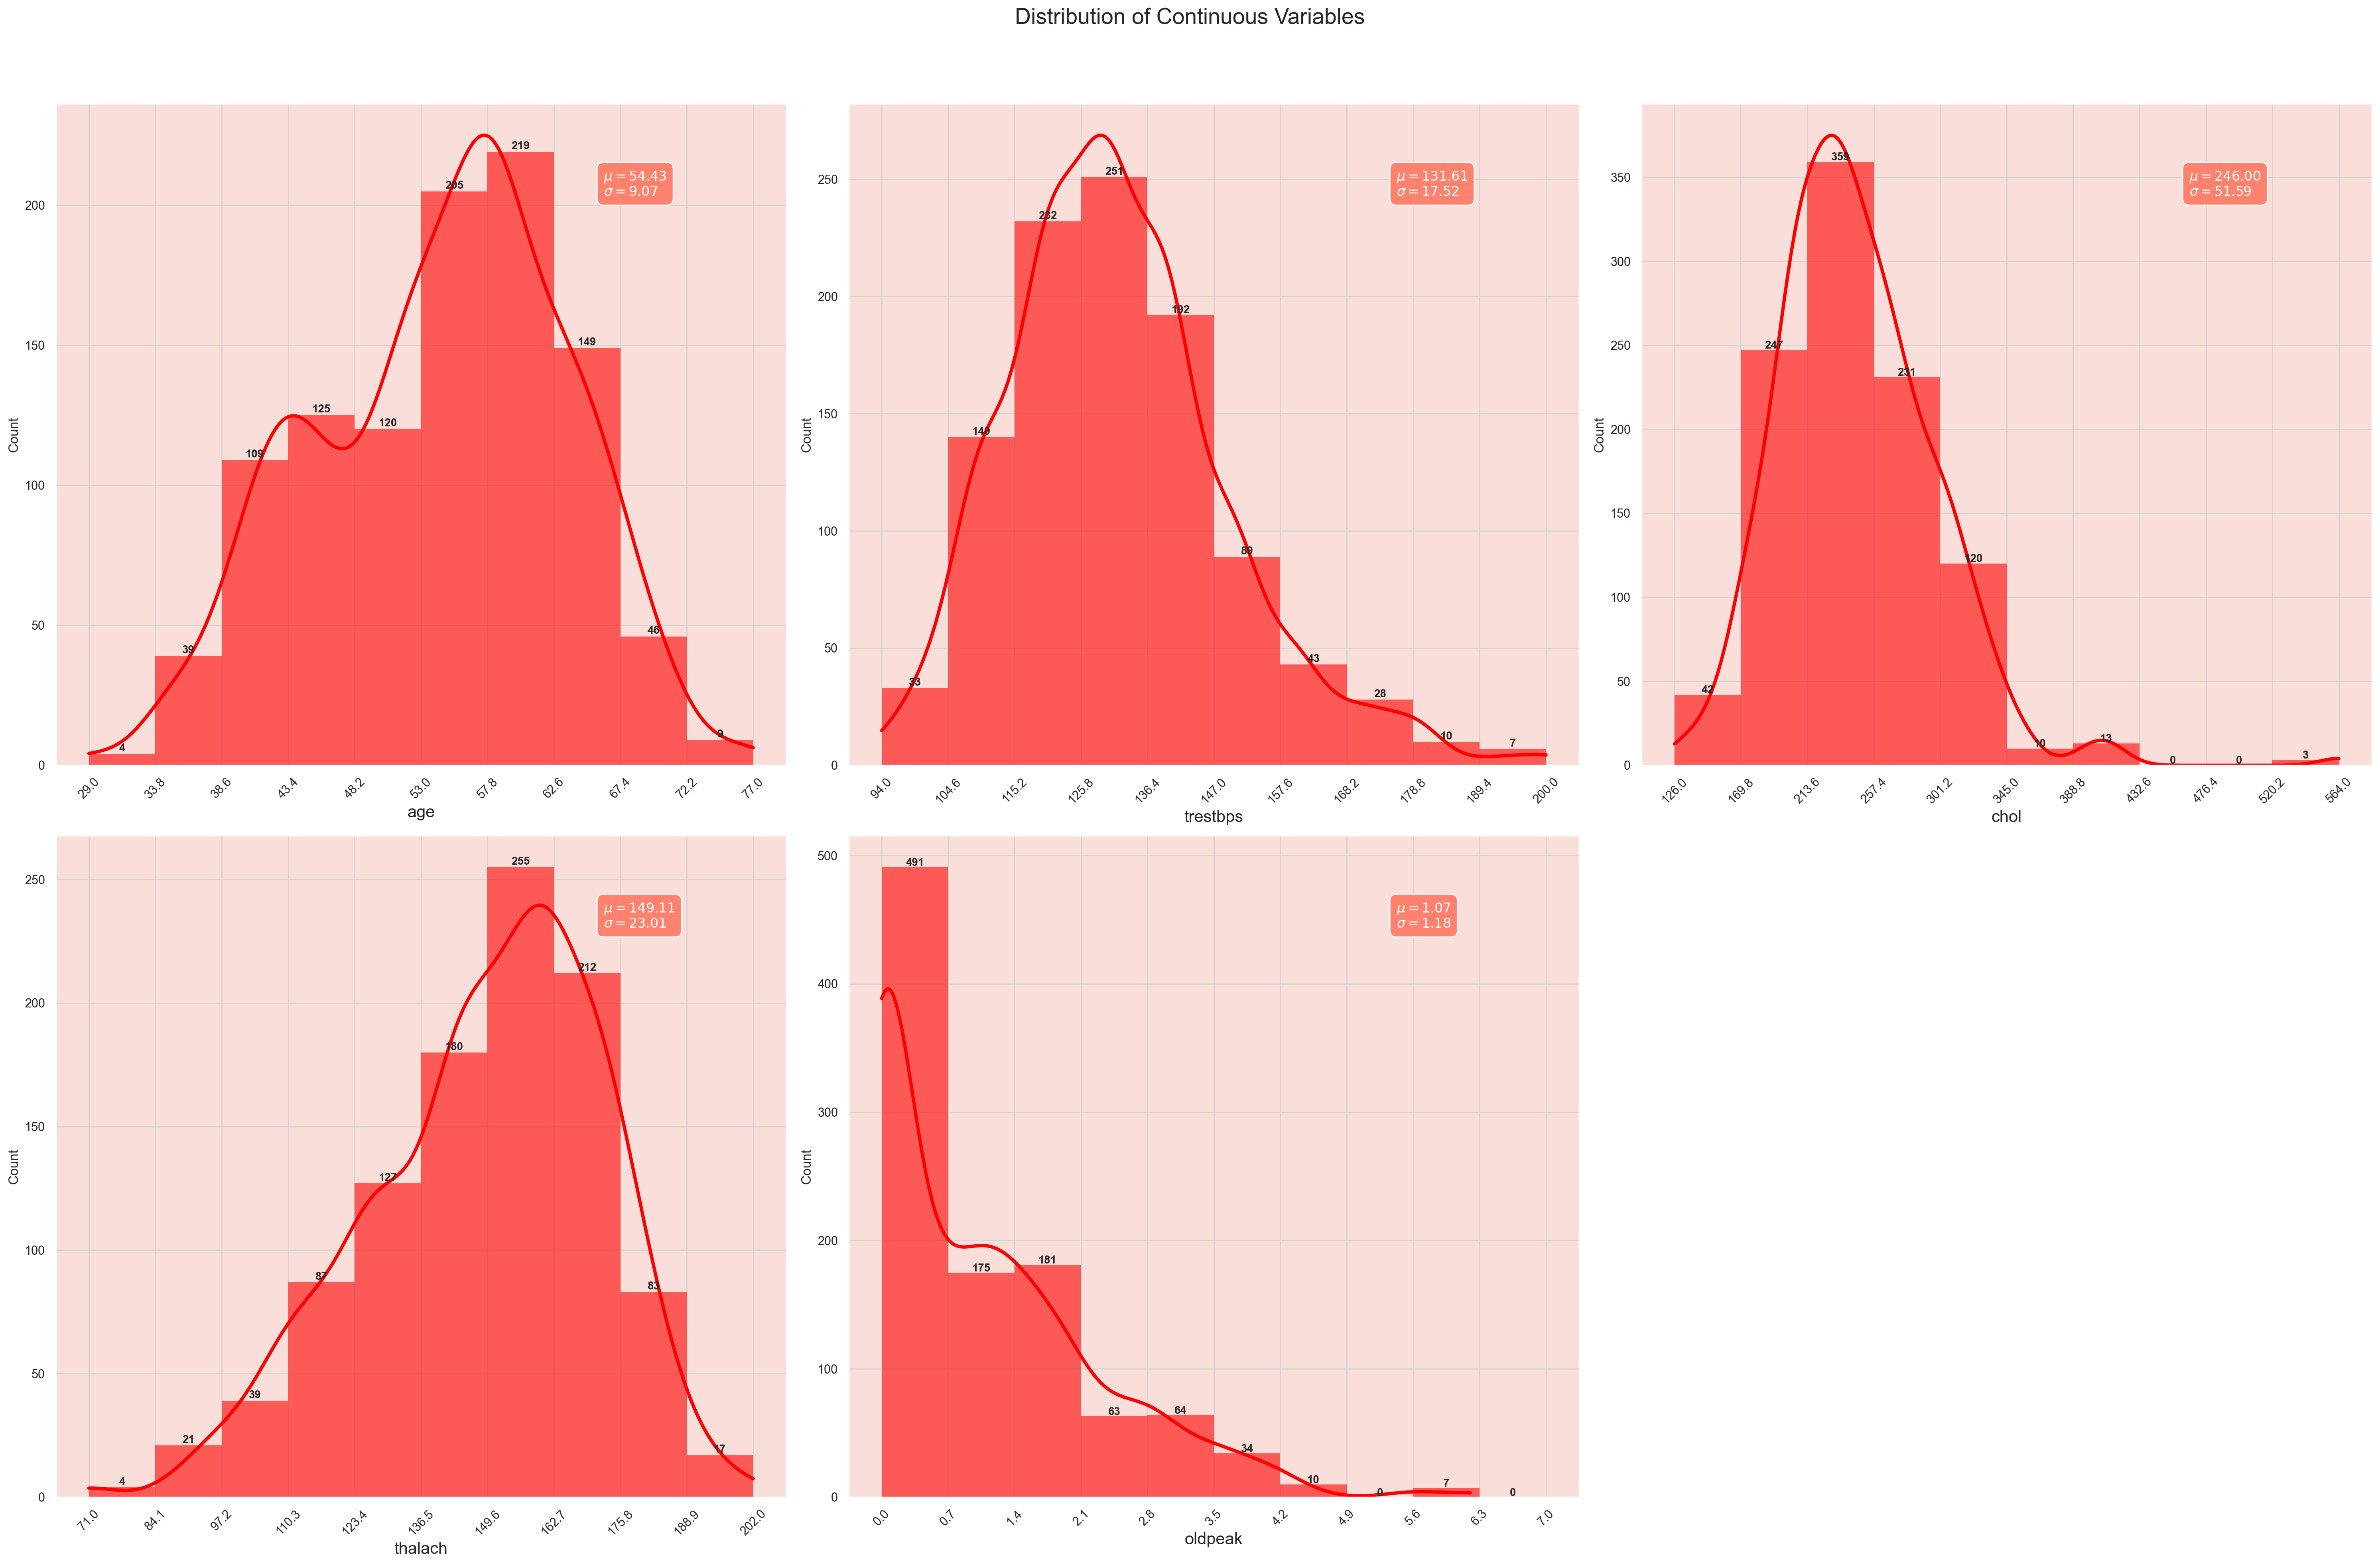

In [172]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [173]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

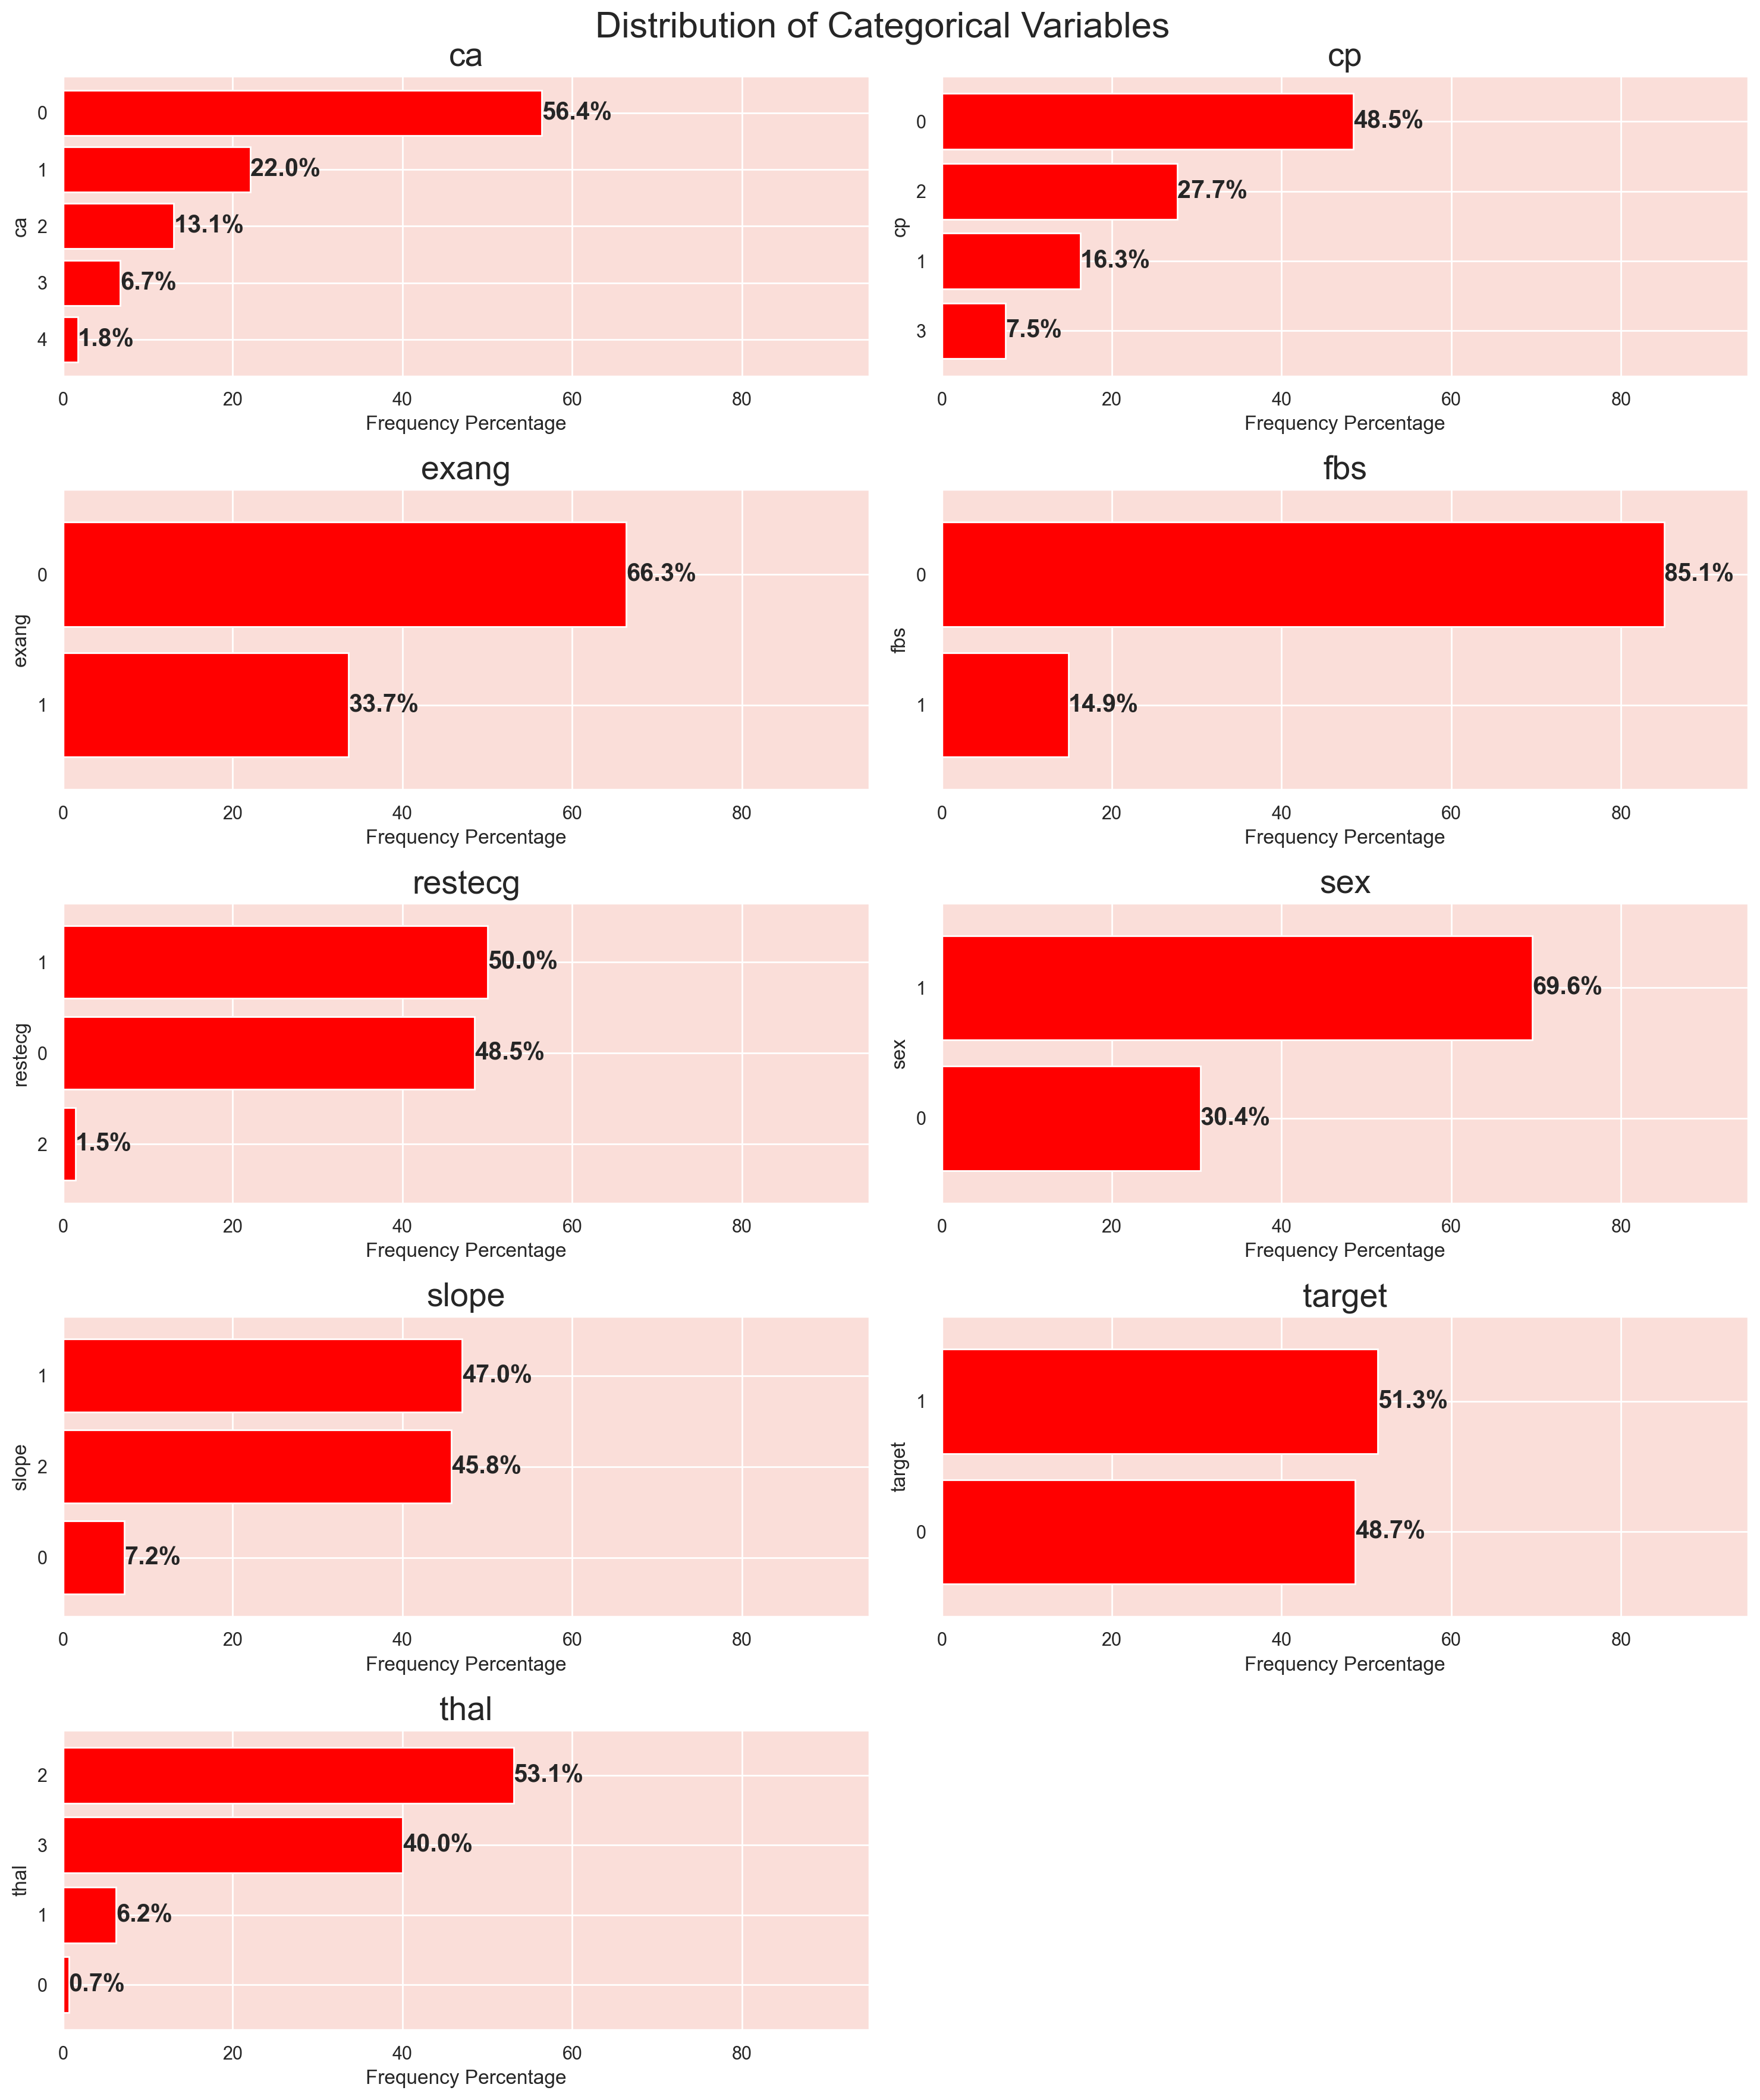

In [174]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

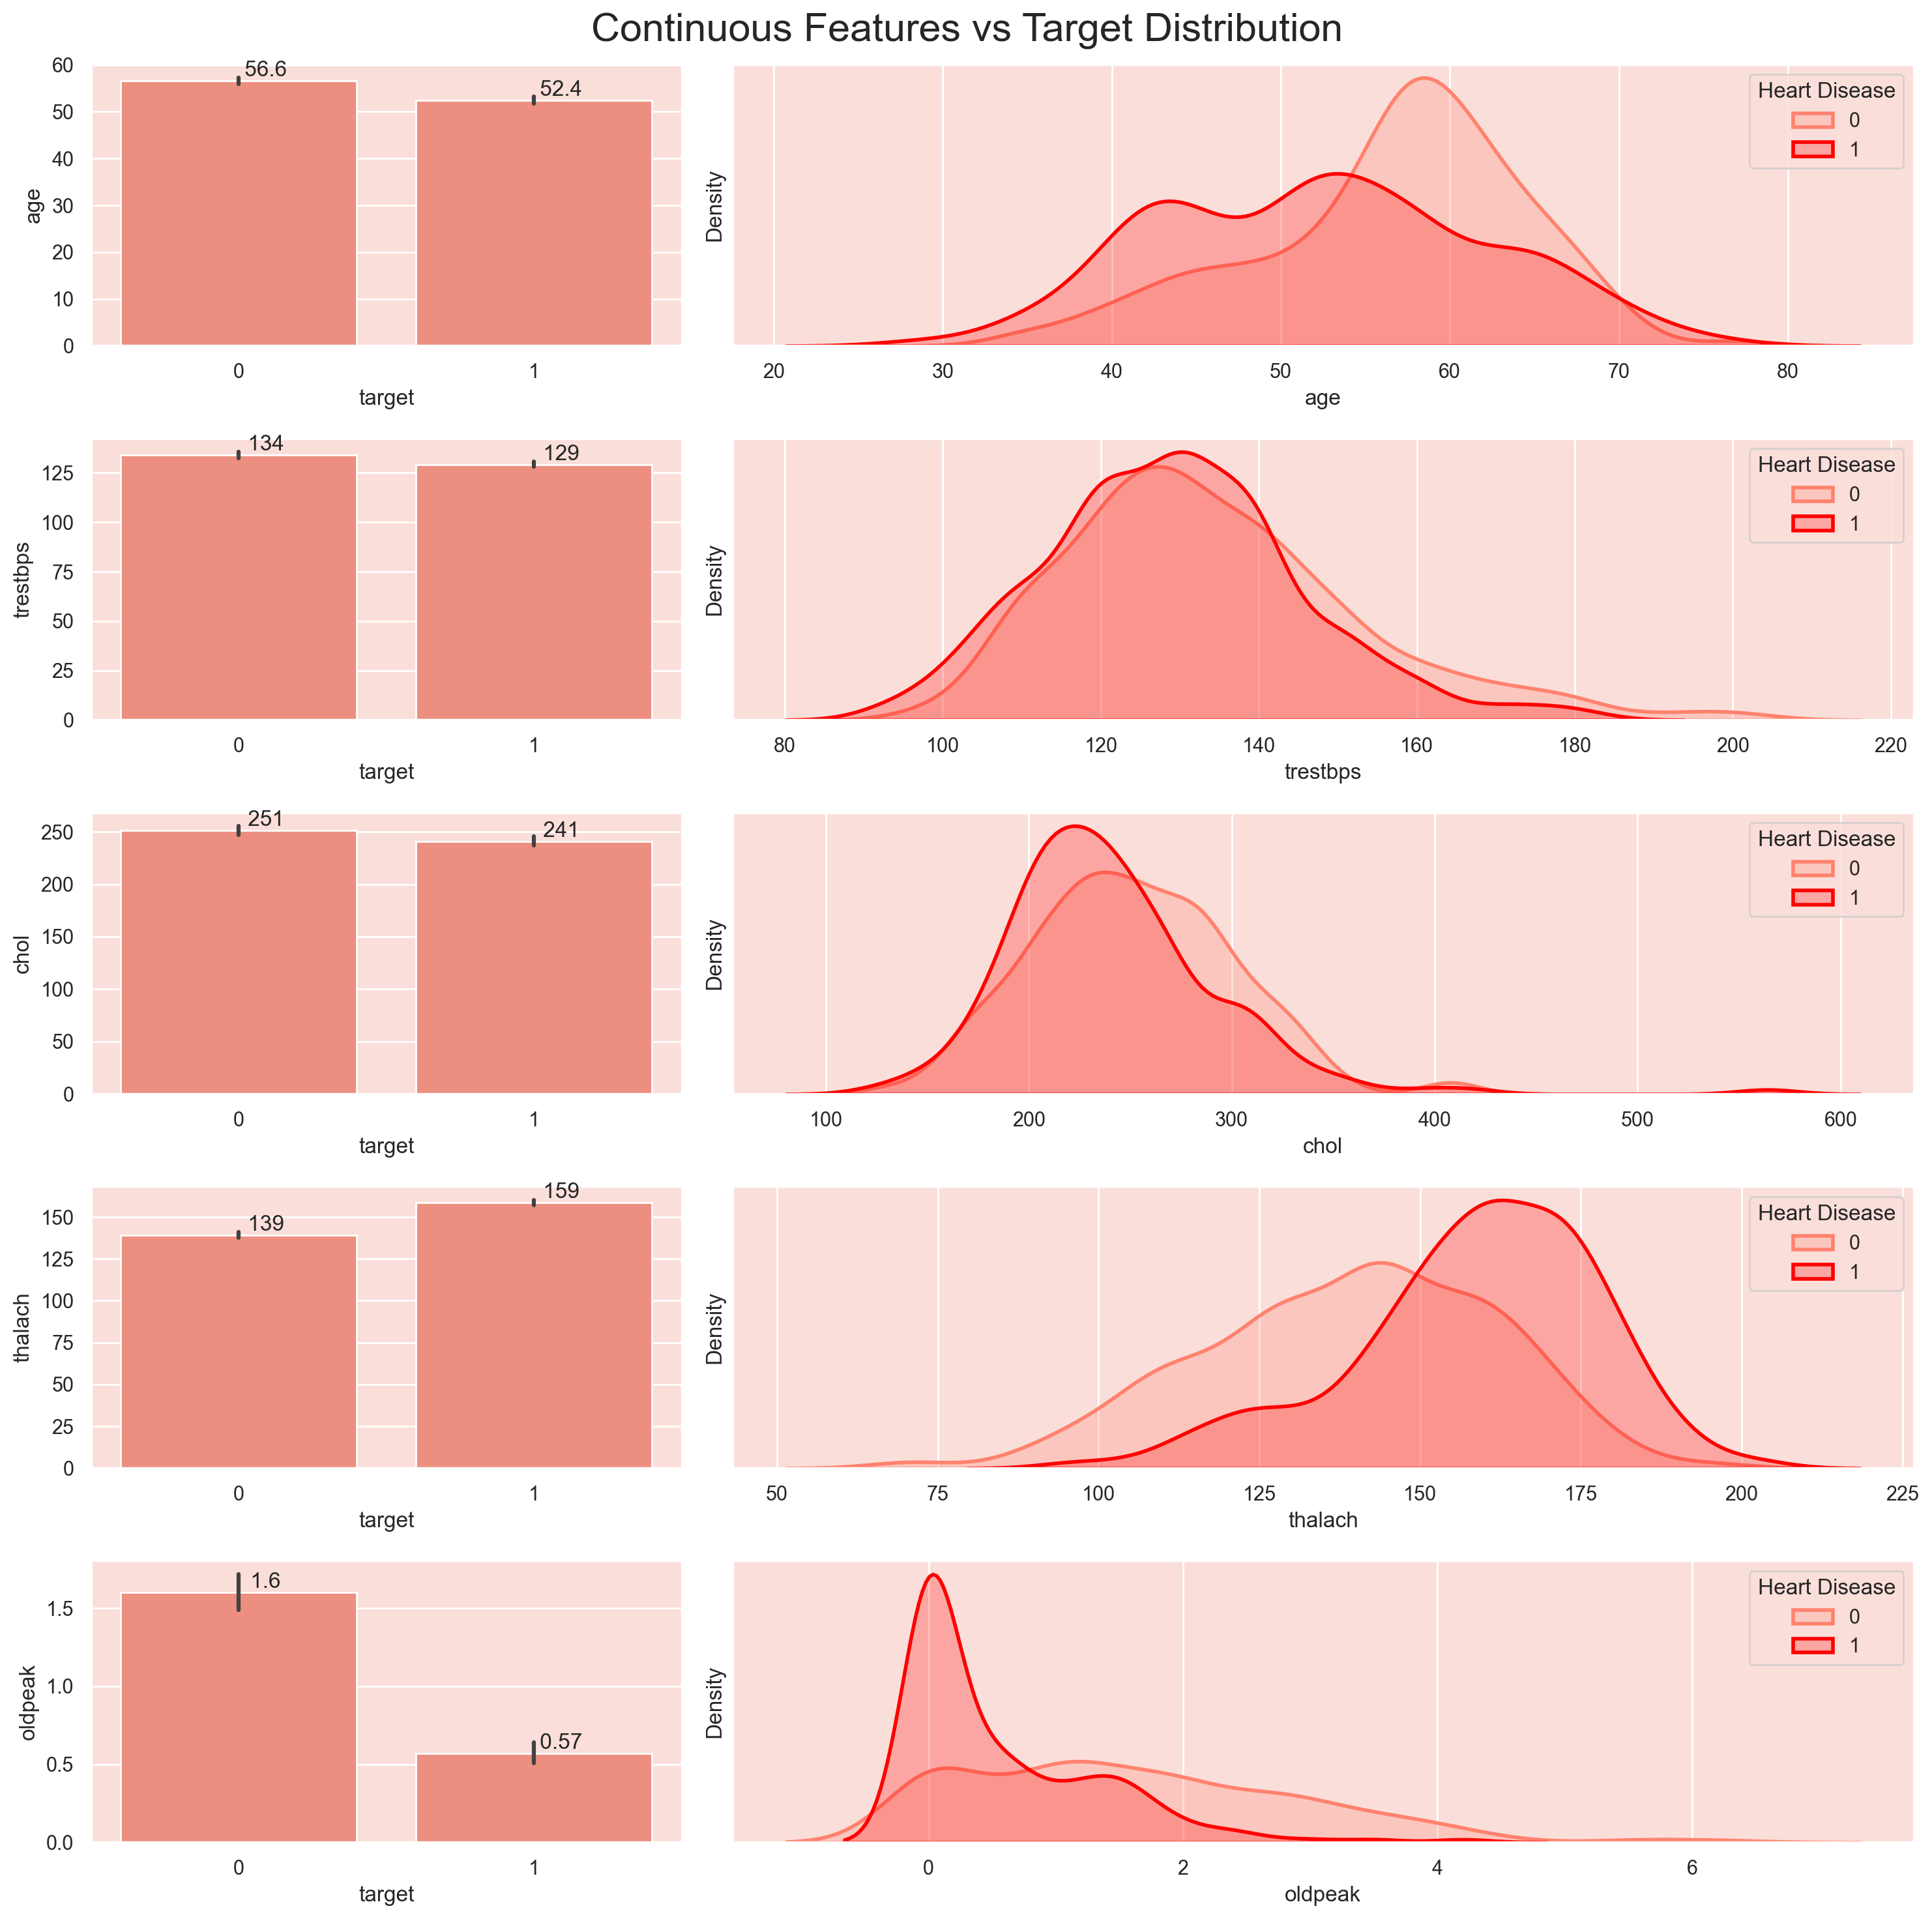

In [175]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [176]:
categorical_features = [feature for feature in categorical_features if feature != 'target']

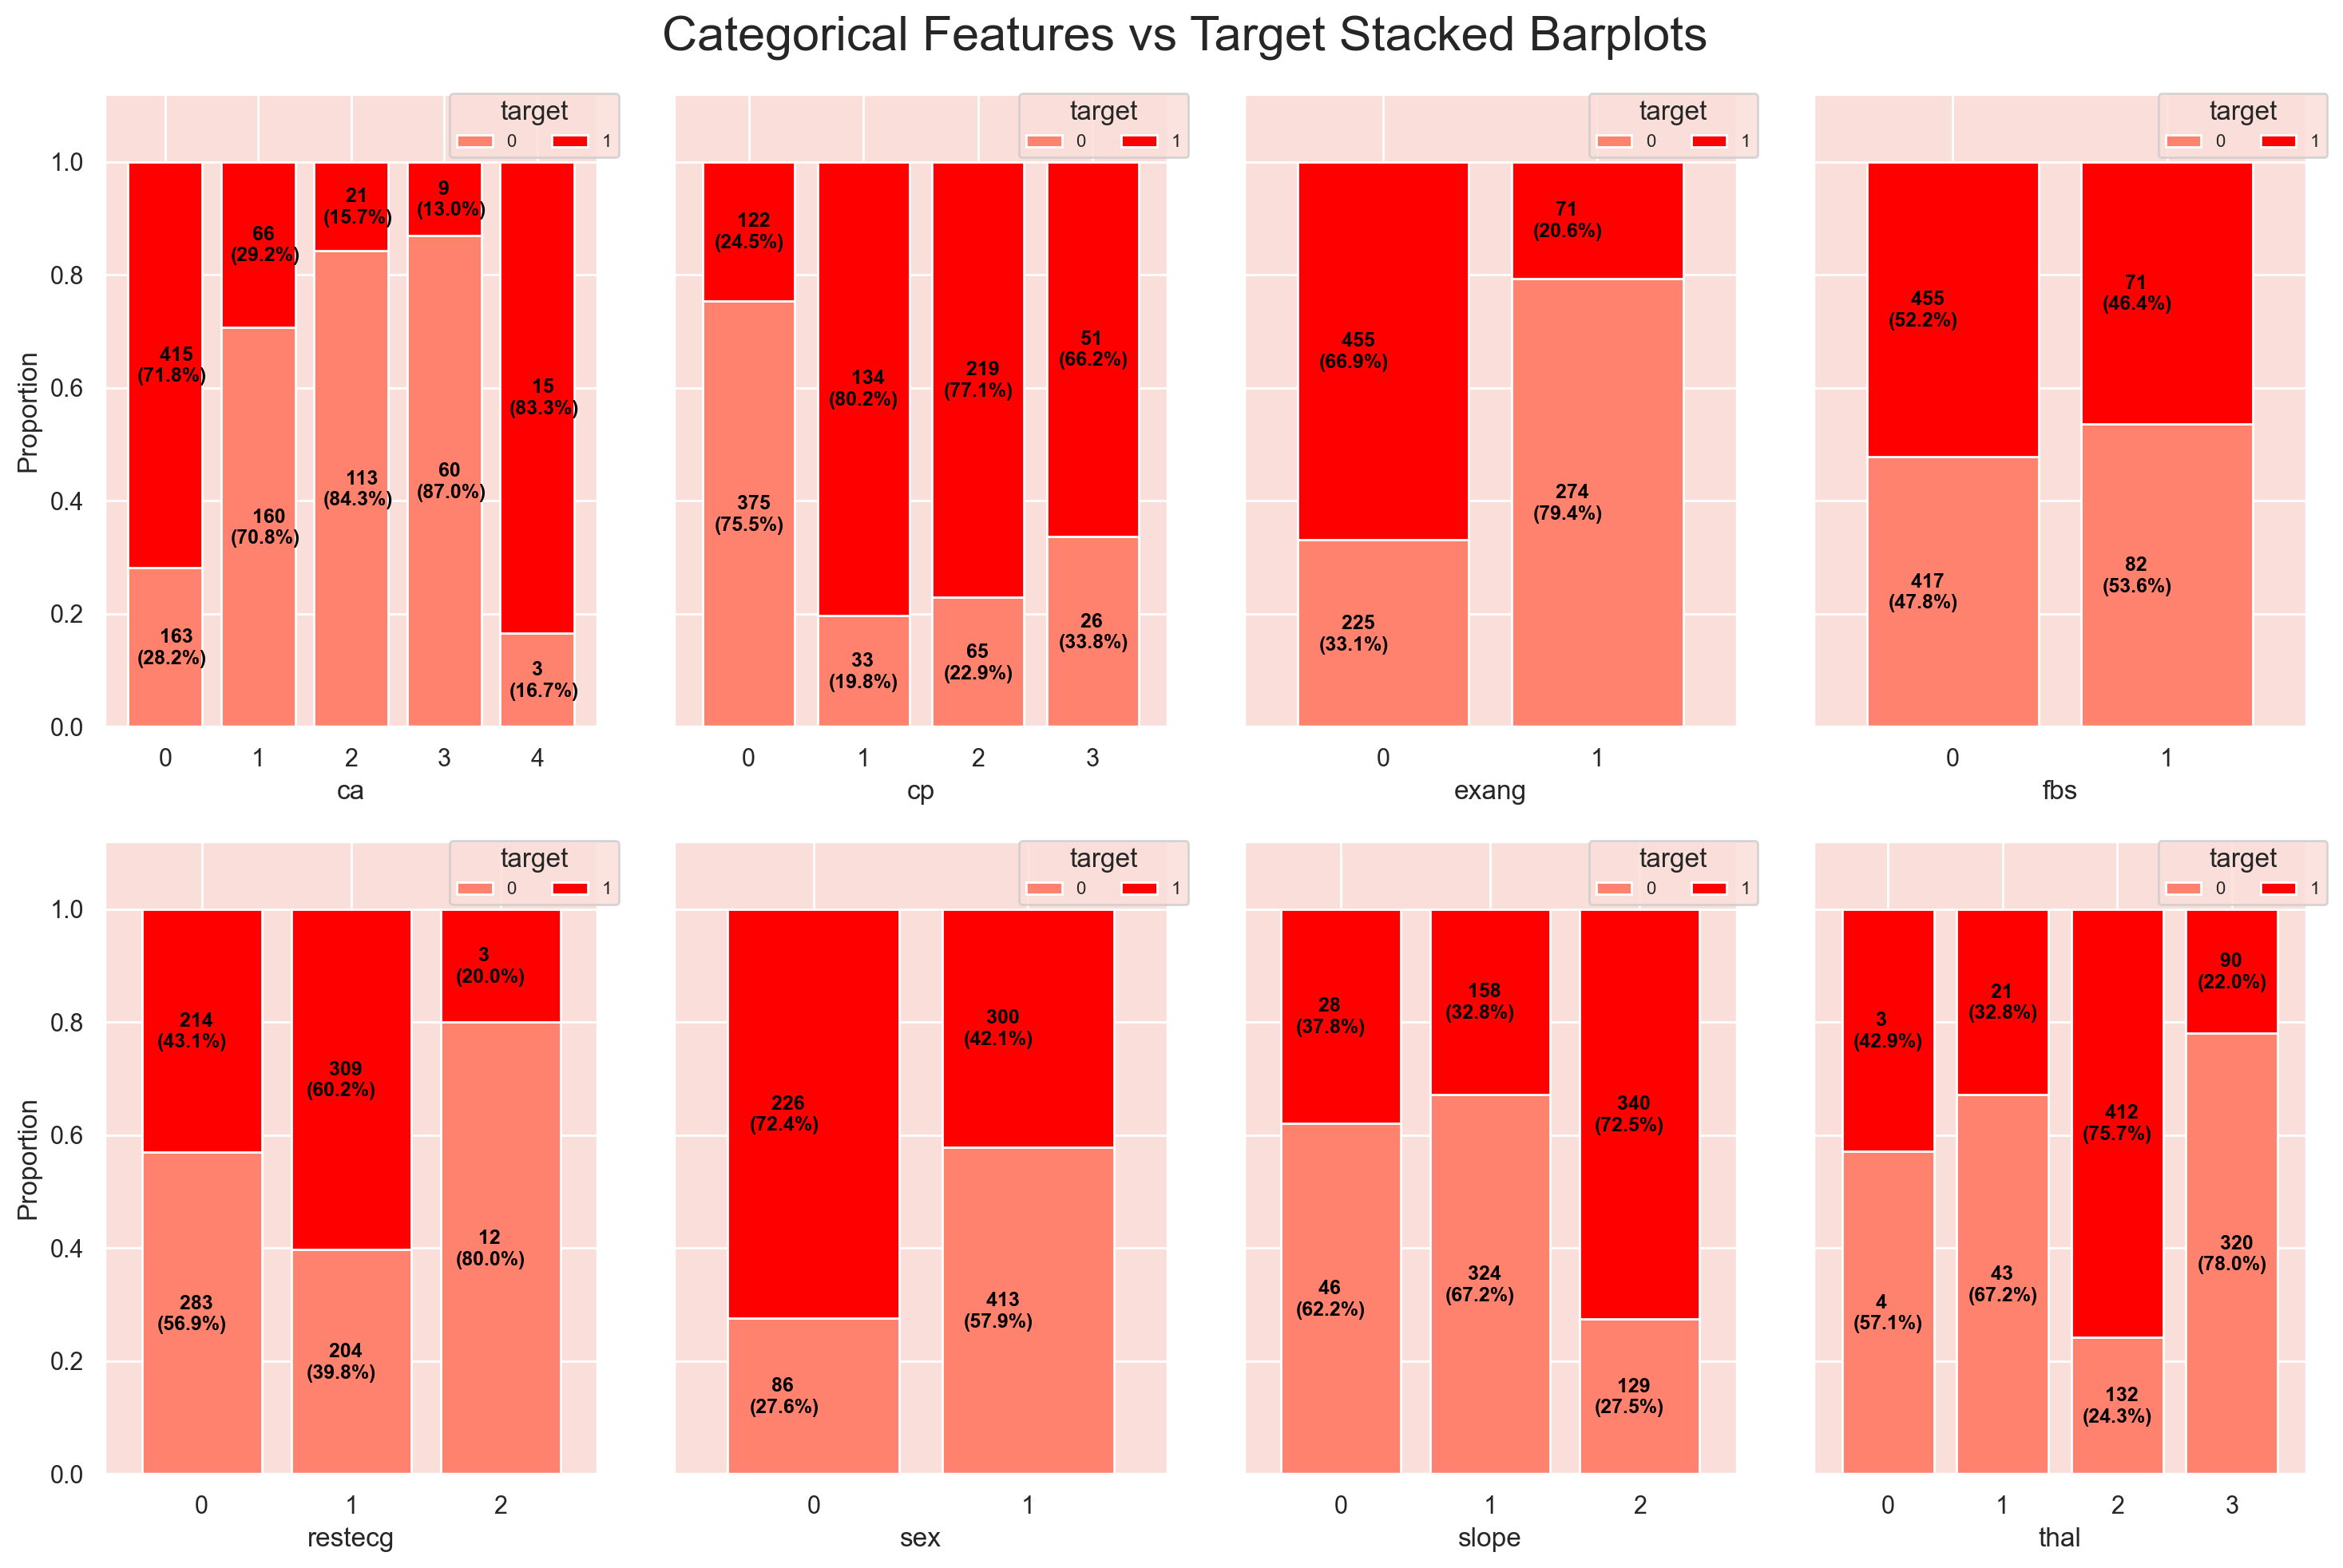

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

In [178]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [179]:

Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

In [180]:
# Remove outliers from the continuous features
for col in continuous_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.reset_index(drop=True, inplace=True)  # Reset index after removing outliers


In [181]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)
# Assuming df is your DataFrame
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype('uint8')    

df_encoded.dtypes


age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

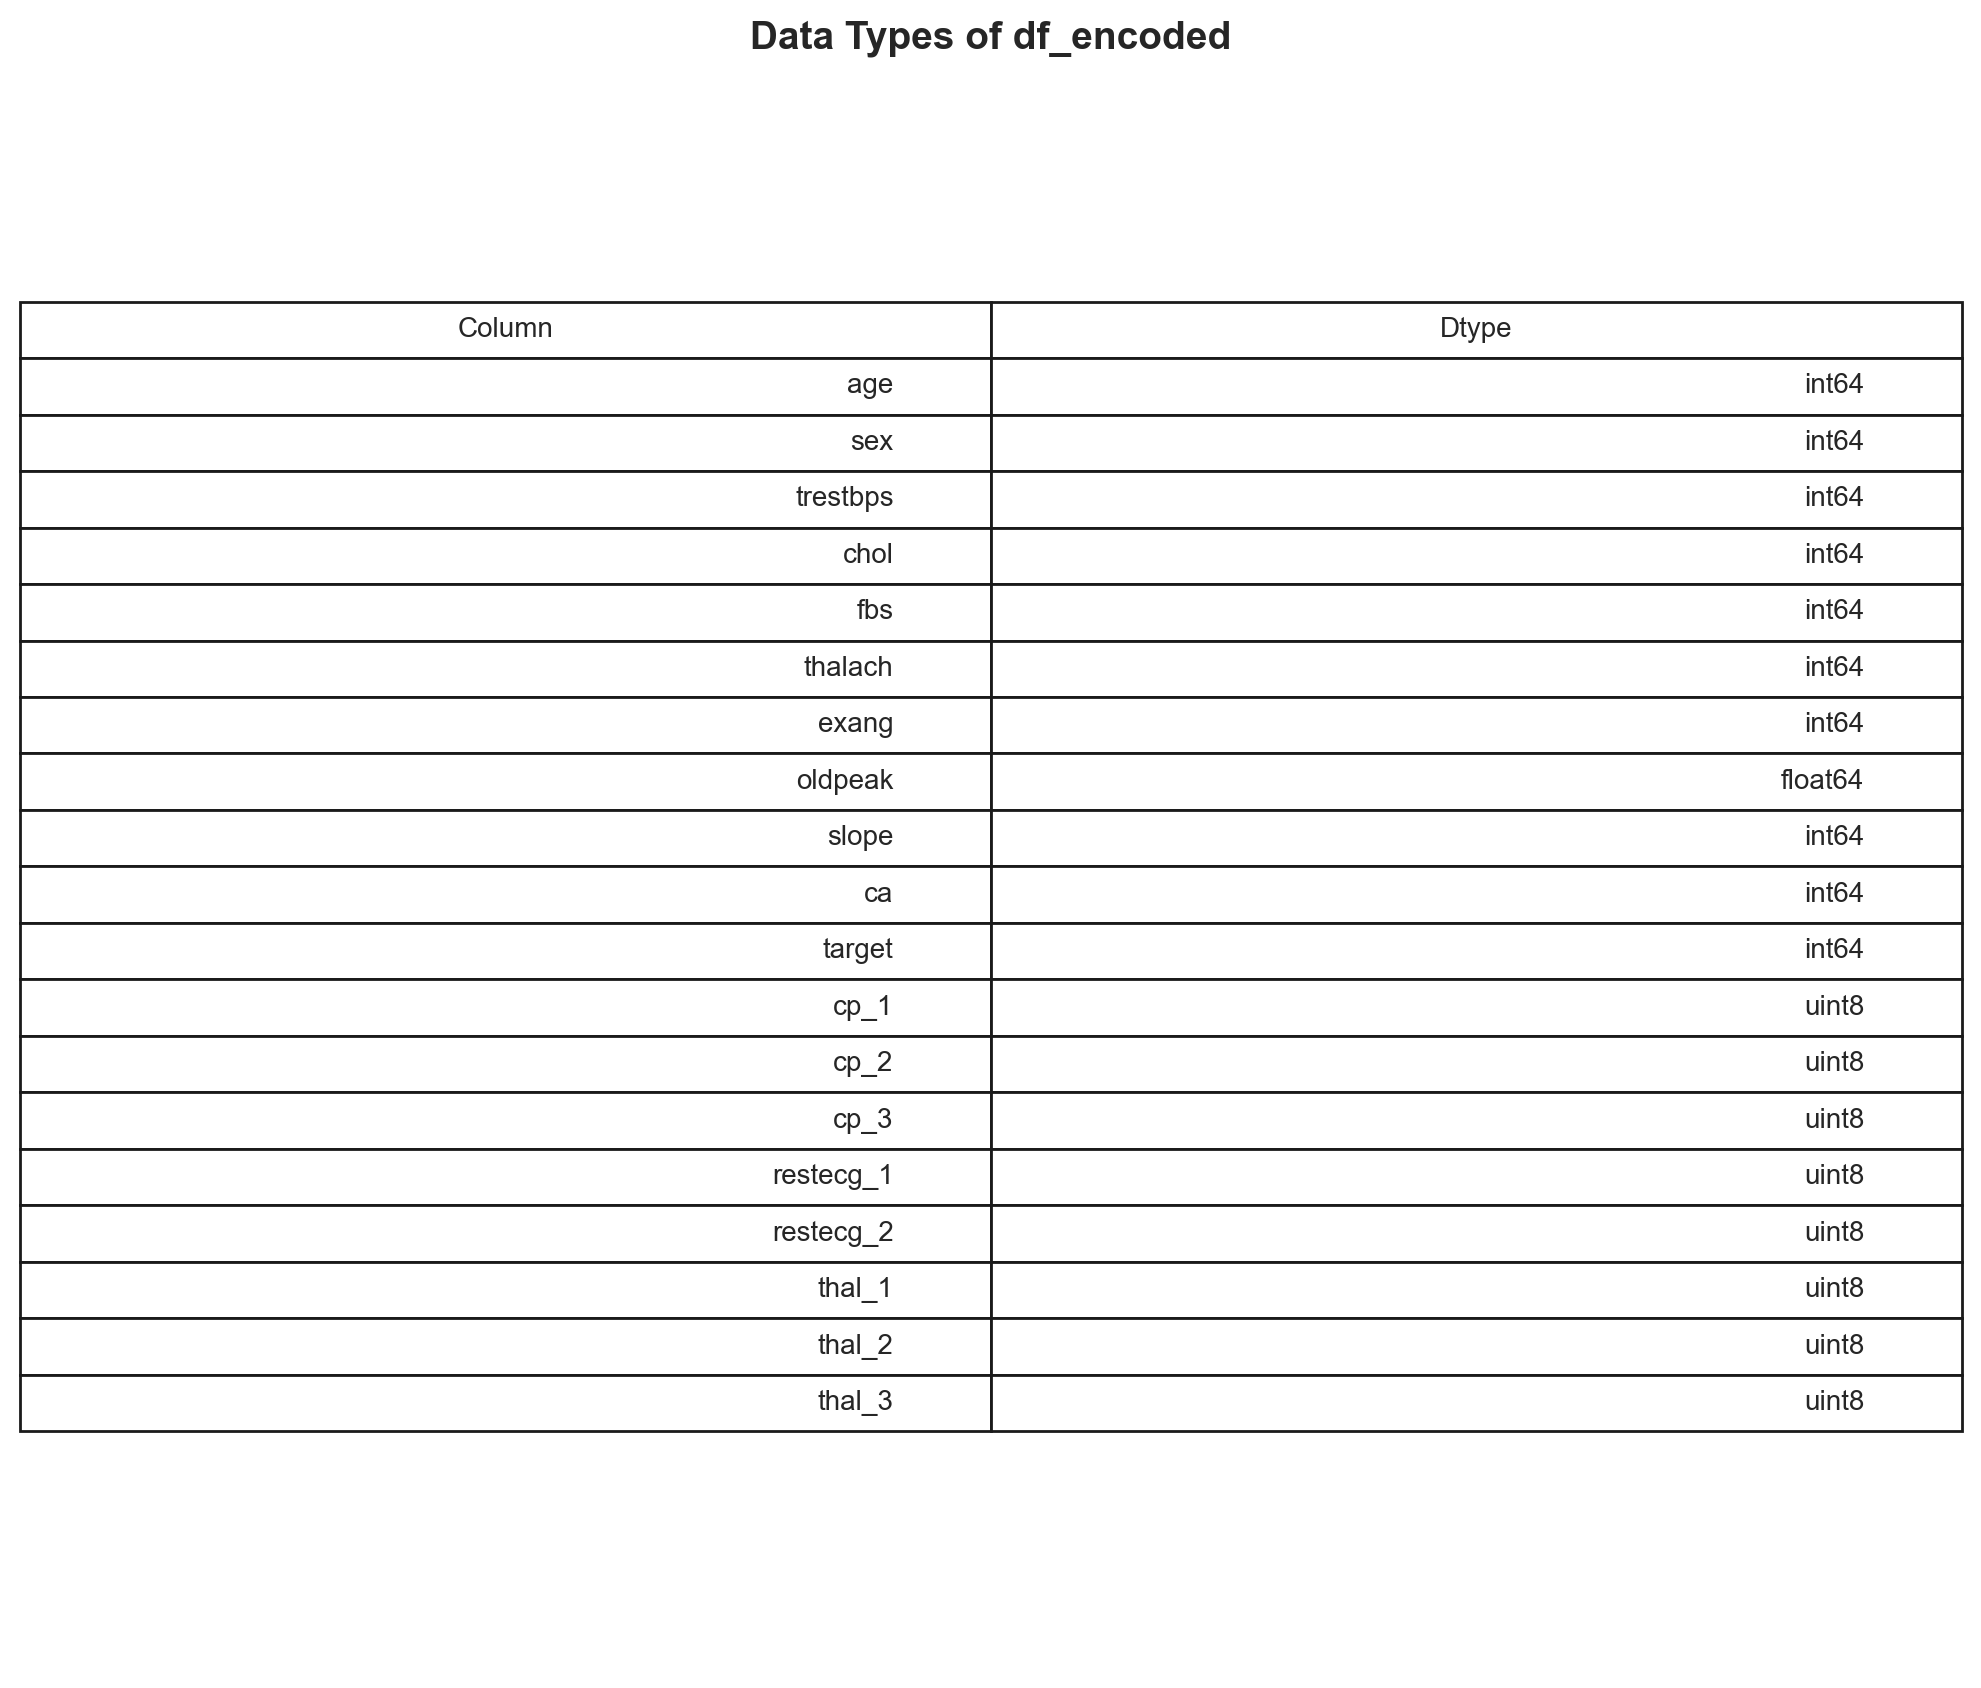

In [207]:
# Create a DataFrame for dtypes
dtypes_df = pd.DataFrame({'Column': df_encoded.columns, 'Dtype': df_encoded.dtypes})

# Plot the table
fig, ax = plt.subplots(figsize=(10, len(dtypes_df) * 0.4 + 1))
ax.axis('off')
table = ax.table(cellText=dtypes_df.values, colLabels=dtypes_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.4)

plt.title("Data Types of df_encoded", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [182]:
df_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,59,1,140,221,0,164,1,0.0,2,0,1,1,0,0,1,0,0,1,0
964,60,1,125,258,0,141,1,2.8,1,1,0,0,0,0,0,0,0,0,1
965,47,1,110,275,0,118,1,1.0,1,1,0,0,0,0,0,0,0,1,0
966,50,0,110,254,0,159,0,0.0,2,0,1,0,0,0,0,0,0,1,0


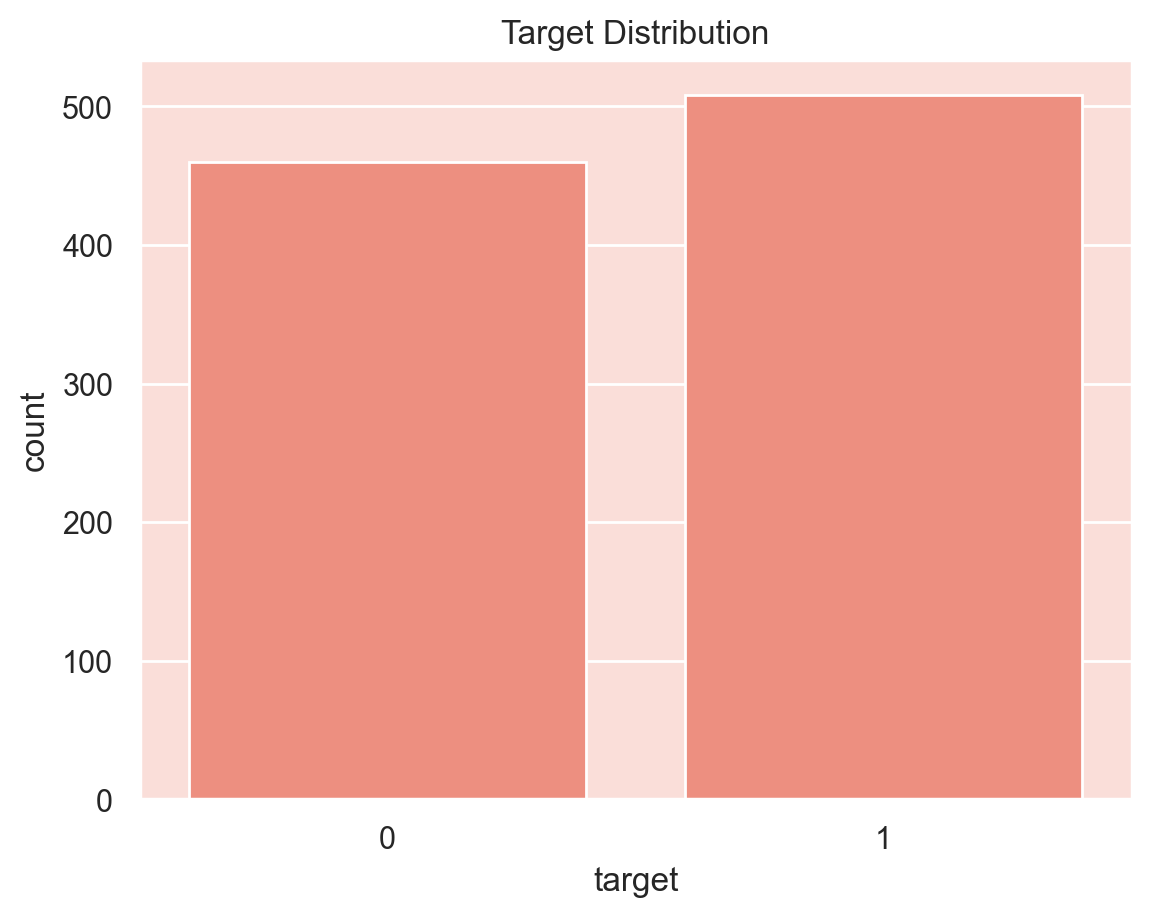

In [183]:
# Check the class balance of the target variable
sns.countplot(x="target", data=df_encoded)
plt.title("Target Distribution")
plt.show()

In [184]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,968.000000,968.000000,968.000000,968.000000,968.000000
mean,54.073347,129.891529,242.448347,149.466942,1.000310
std,9.127036,15.323725,45.264264,22.682671,1.072853
min,29.000000,94.000000,126.000000,88.000000,0.000000
25%,47.000000,120.000000,209.000000,132.000000,0.000000
50%,55.000000,130.000000,239.000000,152.000000,0.800000
75%,60.250000,140.000000,273.000000,168.000000,1.600000
max,77.000000,170.000000,360.000000,202.000000,4.400000


In [185]:
# Fill missing values with the median (if any)
df.fillna(df.mean(), inplace=True)

In [186]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["cp", "thal", "slope"]
df = pd.get_dummies(df, columns=categorical_features)

In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ["age", "trestbps", "chol", "thalach", "oldpeak"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [188]:

from imblearn.over_sampling import SMOTE

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [189]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['sex', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'cp_1', 'cp_2',
       'thal_2', 'thal_3'],
      dtype='object')


Decision tree evaluation

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [210]:
clf= DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf.fit(X_train,y_train.ravel())
y_pred=clf.predict (X_test)

In [211]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy: " ,accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[100   6]
 [ 12  86]]
Accuracy:  0.9117647058823529
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       106
           1       0.93      0.88      0.91        98

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204



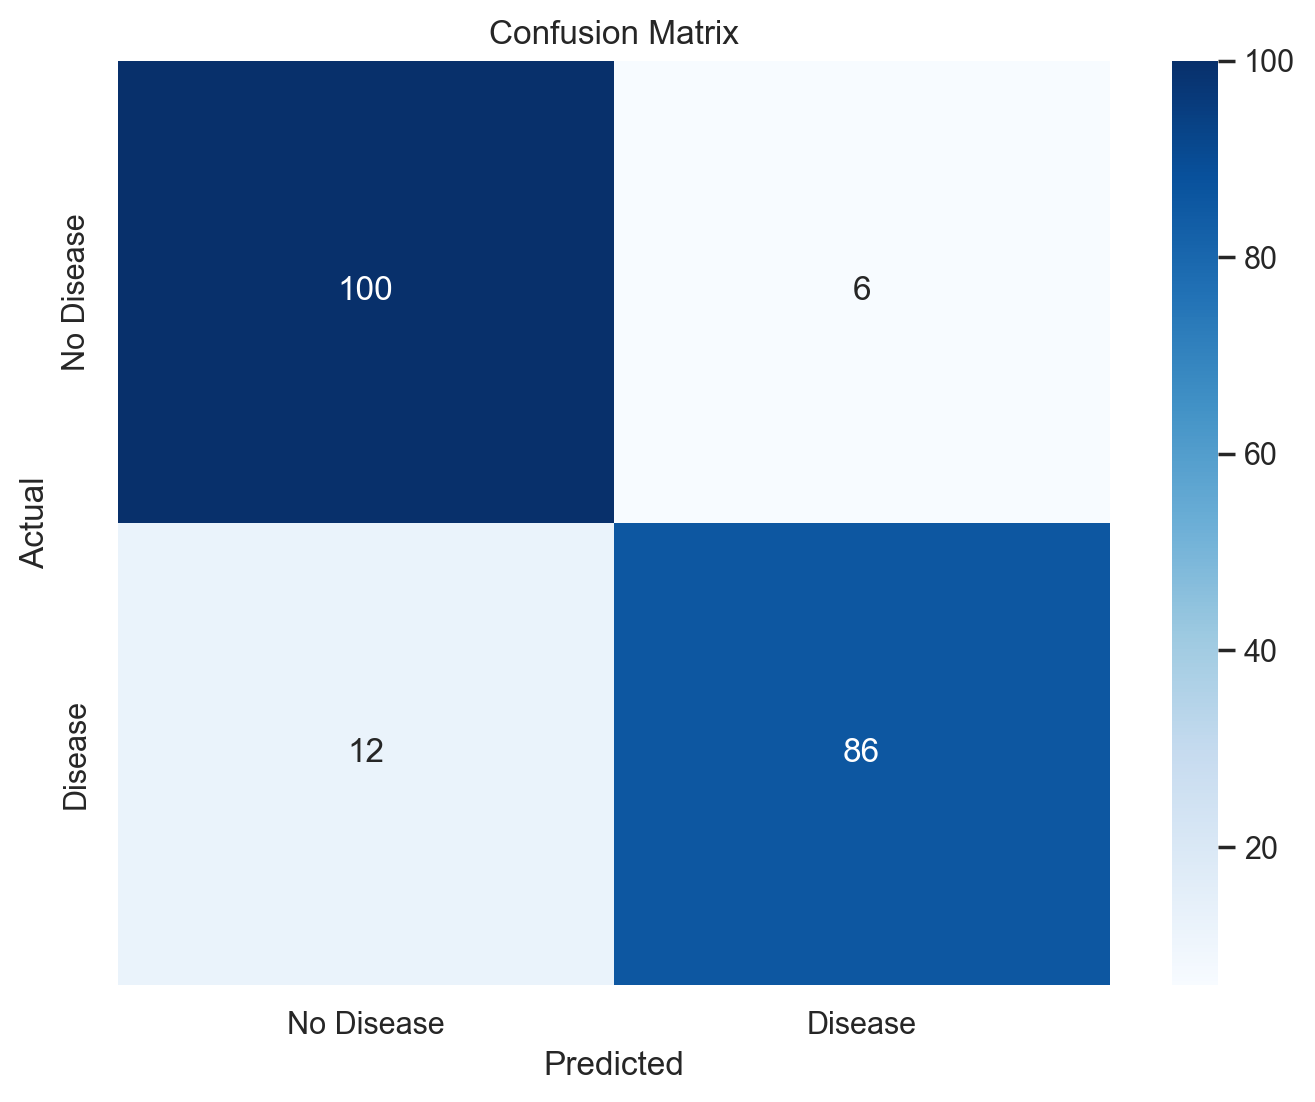

In [212]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM evaluation

In [213]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])
SVC(kernel='sigmoid', C=1, gamma=0.1)


SVC(C=1, gamma=0.1, kernel='sigmoid')

In [215]:
svm_pipeline.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = svm_pipeline.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99  7]
 [ 3 95]]
Accuracy: 0.9509803921568627
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       106
           1       0.93      0.97      0.95        98

    accuracy                           0.95       204
   macro avg       0.95      0.95      0.95       204
weighted avg       0.95      0.95      0.95       204



In [196]:
SVC(kernel='poly', C=1, gamma=0.1)


SVC(C=1, gamma=0.1, kernel='poly')

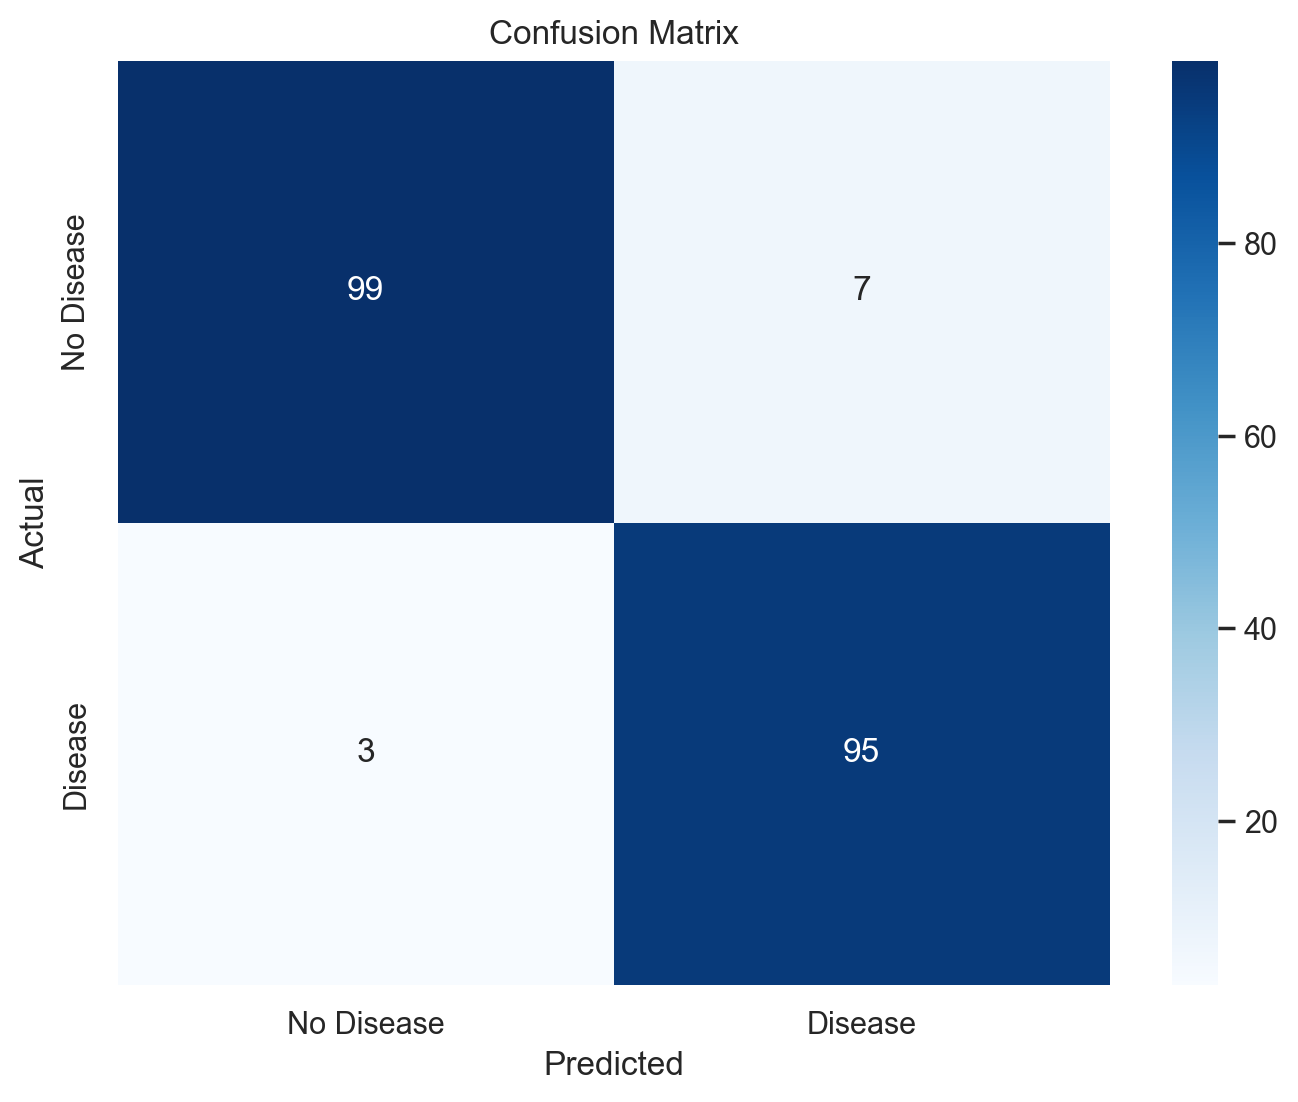

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random forest evaluation

In [228]:
from sklearn.ensemble import RandomForestClassifier
rf_base = RandomForestClassifier(random_state=0)

In [229]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [230]:
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}


In [231]:

print(accuracy_score(y_train, best_rf.predict(X_train))*100)
print(classification_report(y_train, best_rf.predict(X_train)))

94.82758620689656
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       402
           1       0.94      0.96      0.95       410

    accuracy                           0.95       812
   macro avg       0.95      0.95      0.95       812
weighted avg       0.95      0.95      0.95       812



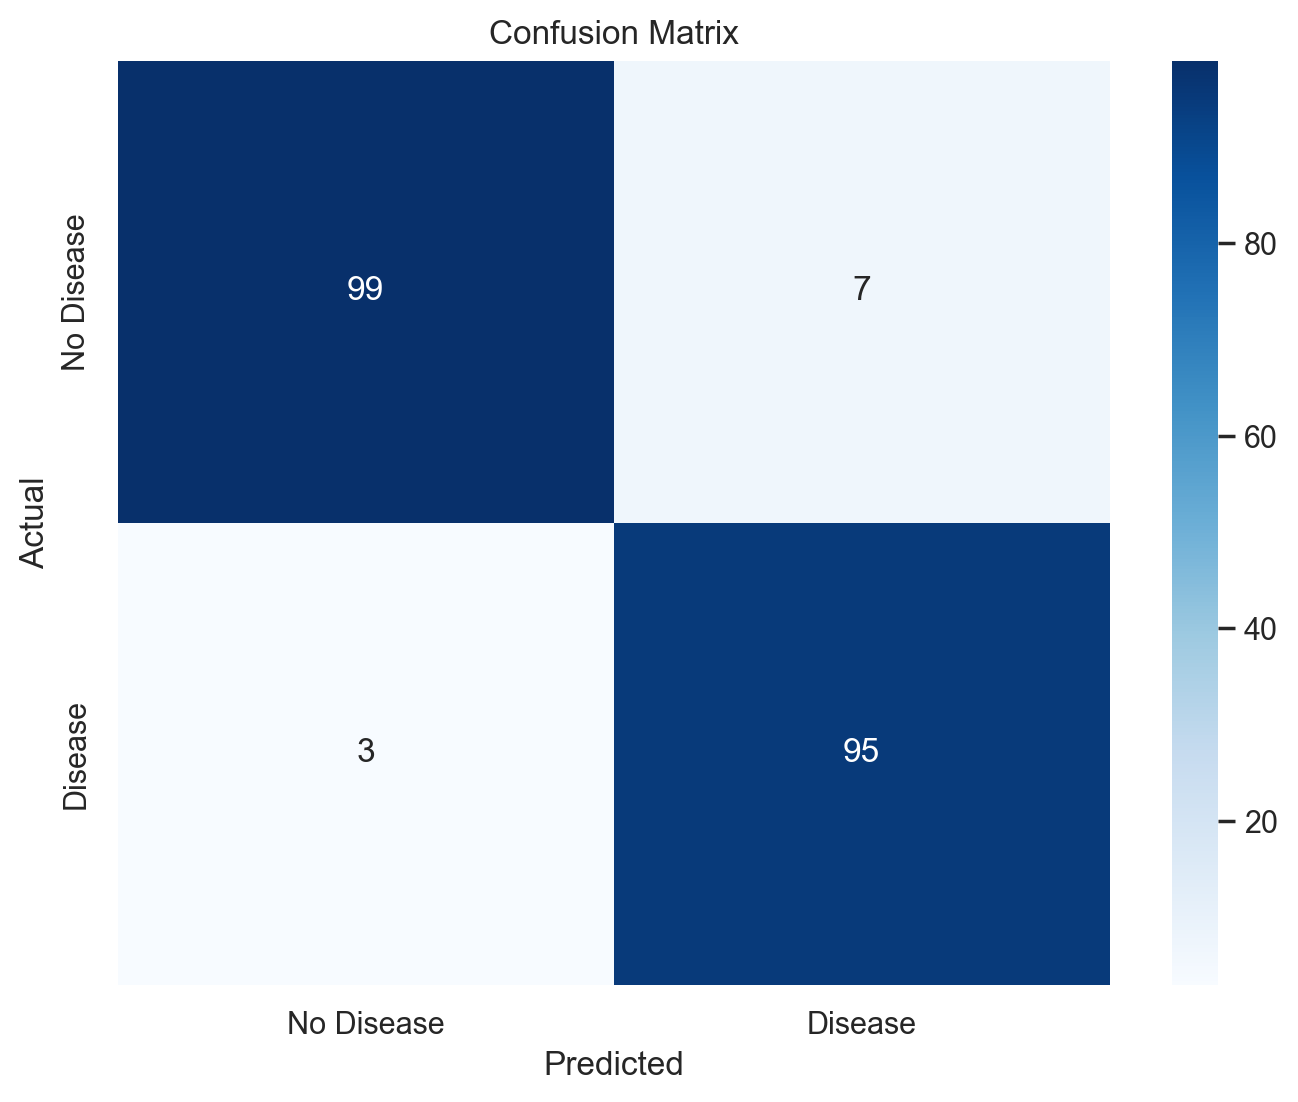

In [232]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

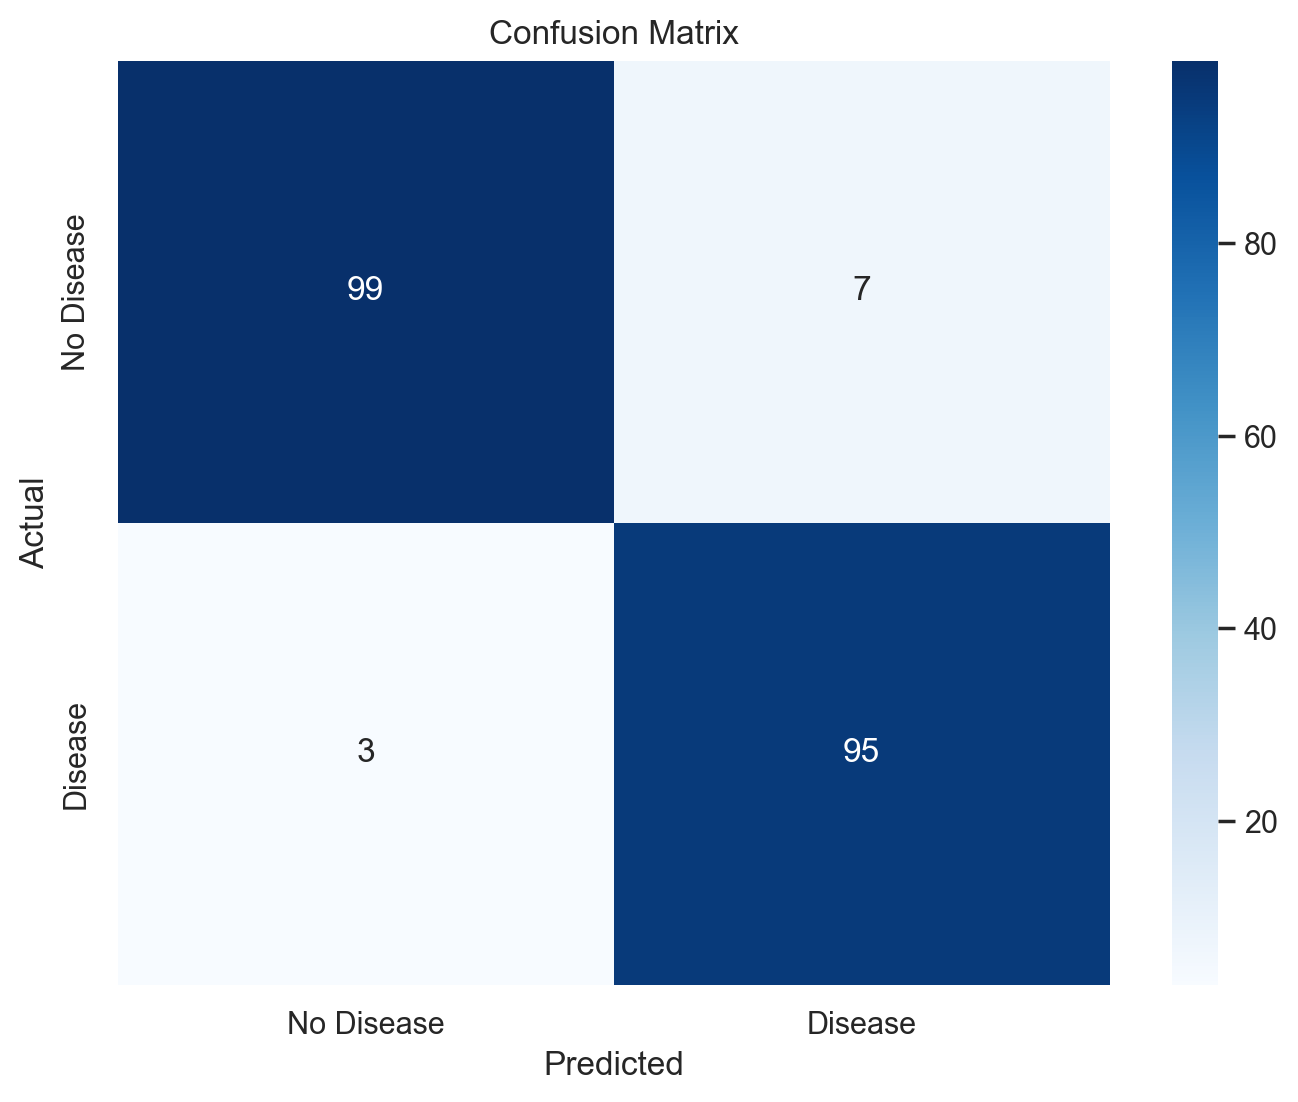

In [221]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

logistic regression evaluation

In [233]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [235]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 1000], # Regularization strength
    'penalty': ['l2', 'none'], # Penalty types supported by default solver 'lbfgs'
    'solver': ['lbfgs', 'liblinear'] # Solvers supported by LogisticRegression
}

# Initialize GridSearchCV with logistic regression and parameter grid
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Evaluate using accuracy
    n_jobs=-1, # Use all available cores
    verbose=1 # Output progress
    )

In [236]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 1000],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [237]:
# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_params = grid_search.best_params_
best_params['max_iter'] = 1000

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8484889797773233


In [238]:
# Apply best parameters to LogisticRegression
model = LogisticRegression(**grid_search.best_params_)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [239]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_train, model.predict(X_train)))
print(classification_report(y_train, model.predict(X_train)))


[[99  7]
 [ 3 95]]
0.8497536945812808
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       402
           1       0.83      0.88      0.86       410

    accuracy                           0.85       812
   macro avg       0.85      0.85      0.85       812
weighted avg       0.85      0.85      0.85       812



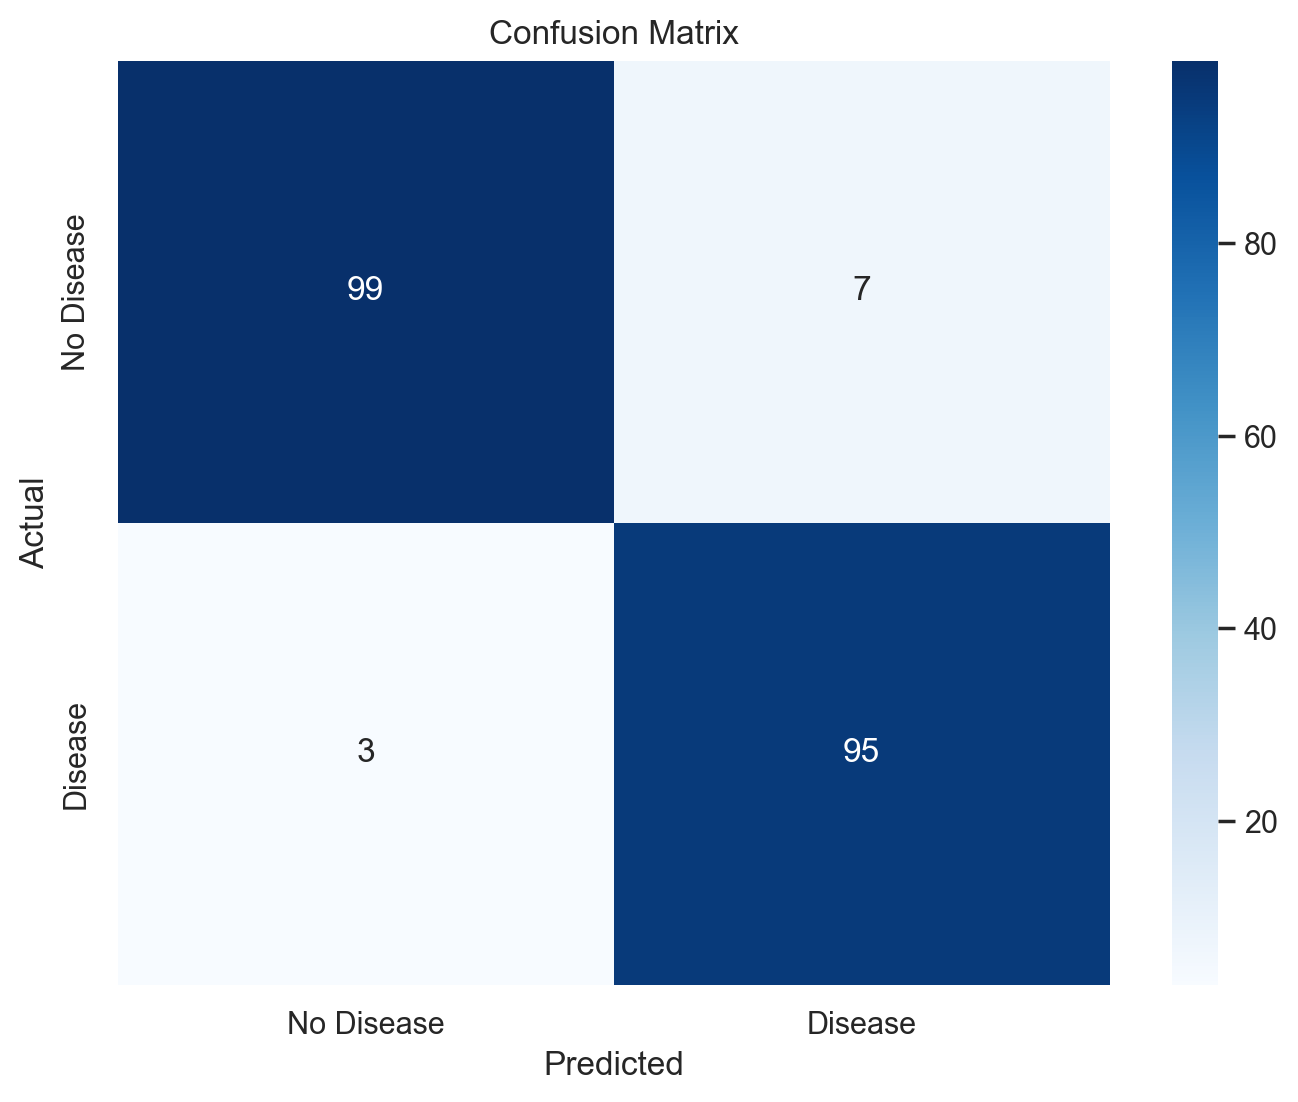

In [240]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()